In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
#IMPORTING THE LIBRARIES REQUIRED

In [2]:
df = pd.read_csv("train.csv")
#IMPORTING THE CSV FILE

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5       2003  \
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0         NaN  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
#HAVING A LIST OF NULL FEATURES

null_features = [features for features in df.columns if df[features].isnull().sum() >0]

In [6]:
null_features

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
#CALCULATING THE NUMBER OF NULL VALUES IN EACH FEATURES

for features in null_features:
    print(features,":",df[features].isnull().sum())

LotFrontage : 259
Alley : 1369
MasVnrType : 872
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


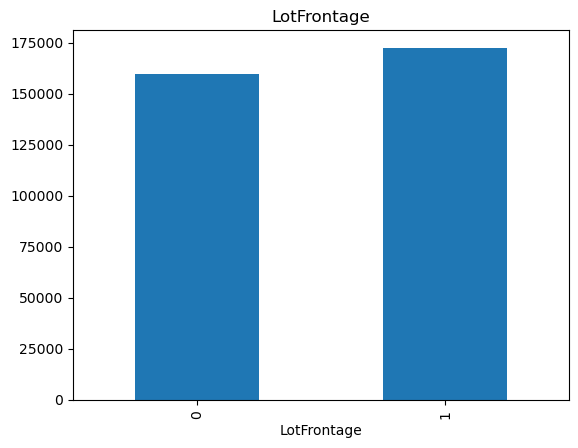

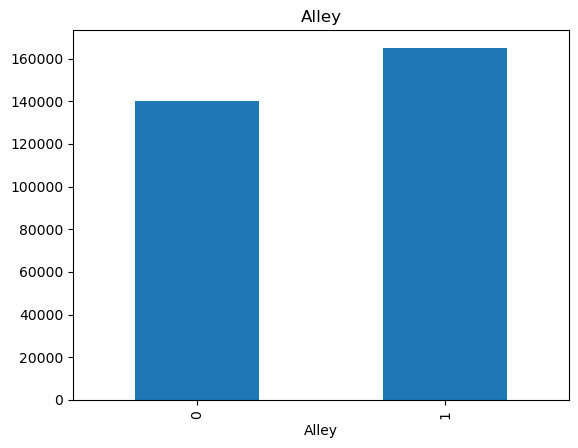

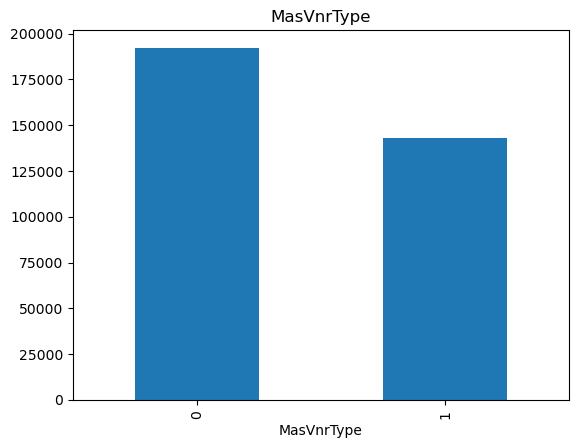

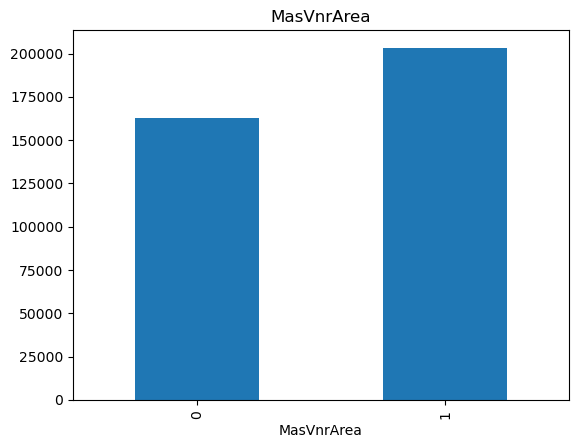

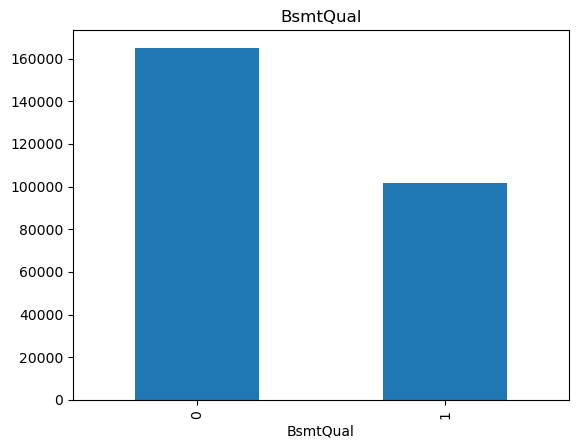

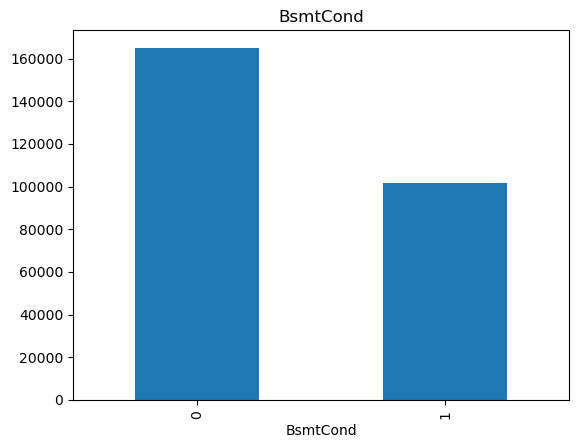

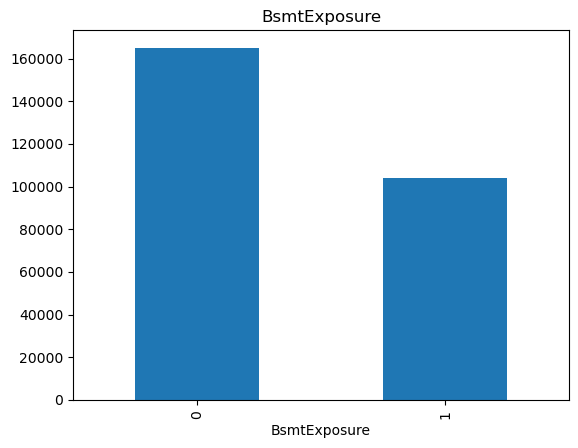

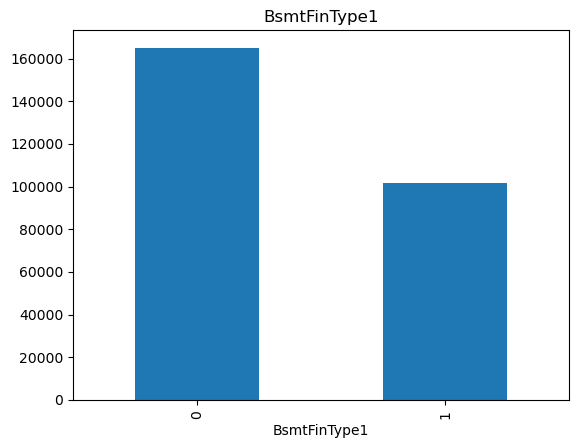

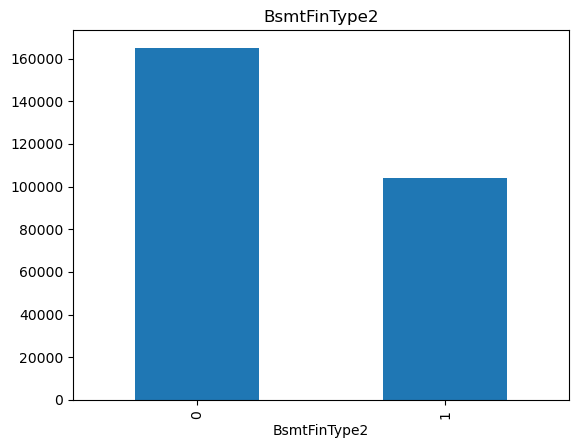

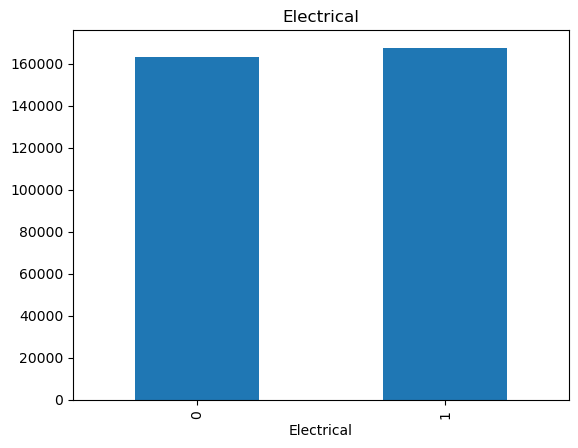

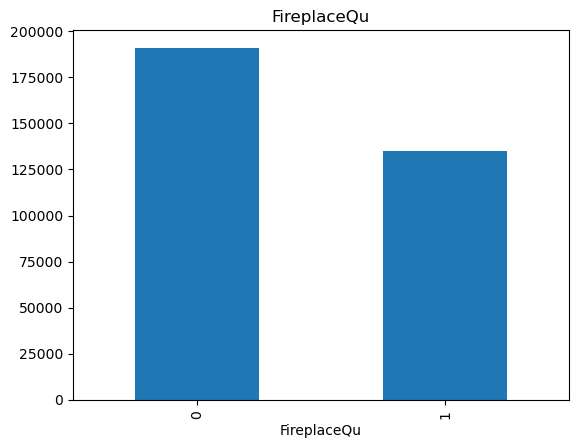

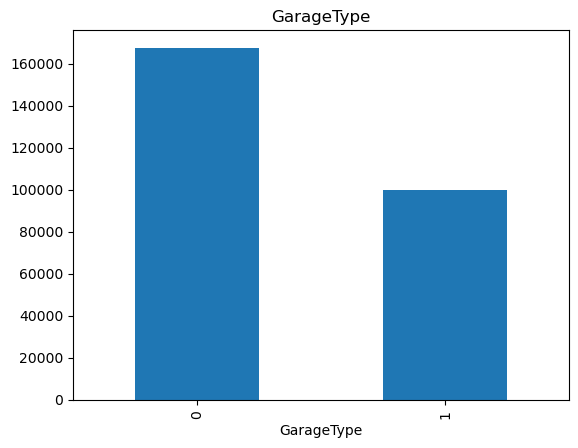

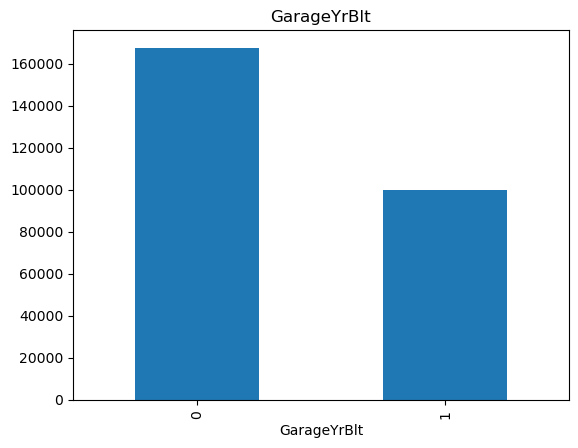

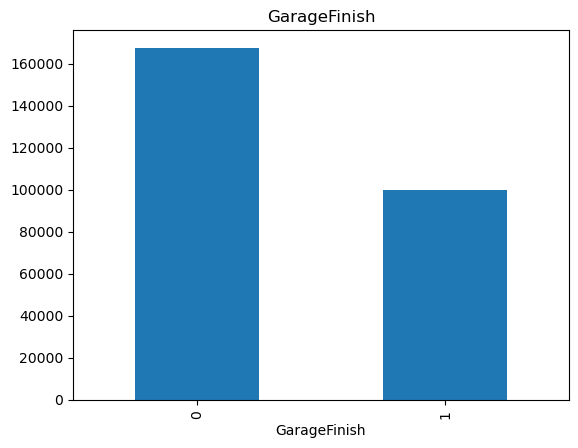

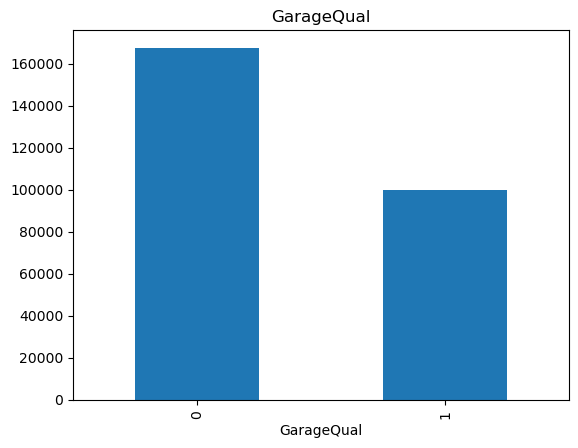

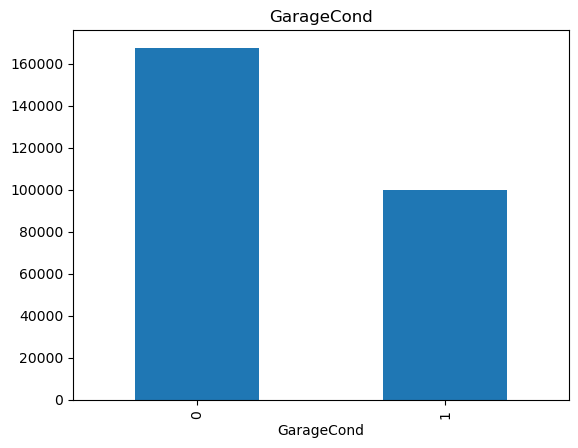

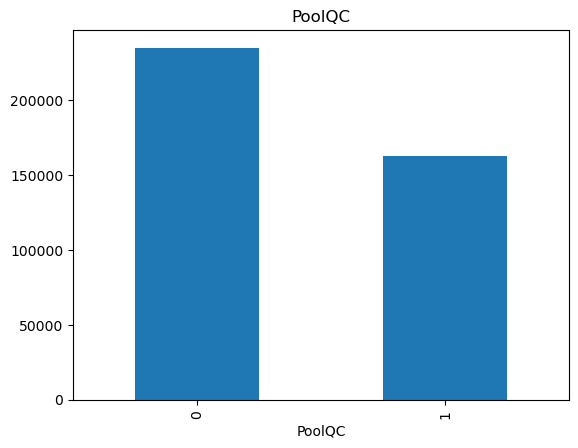

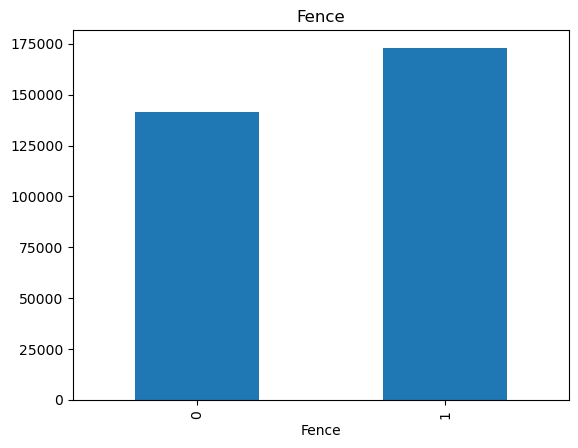

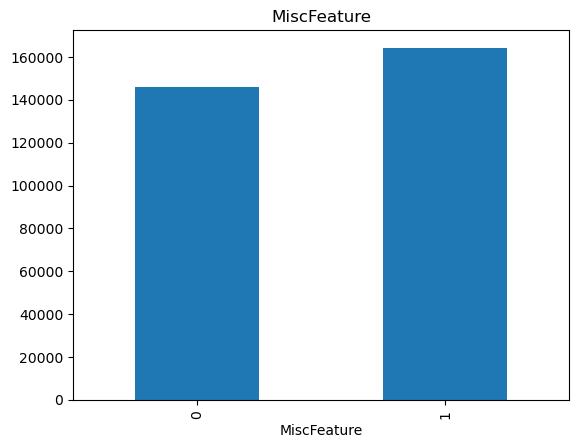

In [8]:
#SEEING THE RELATION BETWEEN SALESPRICE I.E. DEPENDENT VARIABLE AND FEATURES WITH NULL VALUES TO CHECK IN CASE 
#THEY PLAY A MAJOR ROLE IN DETERMINING THE SALEPRICE.

for features in null_features:
    data = df.copy()
    data[features] = np.where(data[features].isnull(),1,0)
    
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

In [9]:
#CREATING A LIST OF NUMERICAL FEATURES 
#NON-CATEGORICAL DATA DOESNT HAVE ITS DATA TYPE IDENTIFIED AS O

num_features = [features for features in df.columns if df[features].dtype != 'O']
df[num_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0   1          60         65.0     8450            7            5       2003  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          2003       196.0         706           0        150          856  \
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0       856       854             0       1710             1             0  \
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces   
0         2         1             3             1             8           0  \
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF   
0       2003.0           2         548           0           61  \
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold   
0              0          0            0         0        0       2    2008  \
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [10]:
#NUMERICAL FEATURES ALSO CONTAINS TEMPORAL VARIABLES SUCH AS DATETIME

year_features = [features for features in num_features if 'Yr'in features or 'Year'in features]
df[year_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [11]:
#WE GROUP THE SALEPRICE MEDIAN VALUES ACCORDING TO THE YEAR IN WHICH THE HOUSES ARE SOLD

a = df.groupby(['YearBuilt'])['SalePrice'].median()

In [12]:
a.first

<bound method NDFrame.first of YearBuilt
1872    122000.0
1875     94000.0
1880    194989.5
1882    168000.0
1885    111250.0
          ...   
2006    239799.0
2007    239000.0
2008    335000.0
2009    226978.0
2010    394432.0
Name: SalePrice, Length: 112, dtype: float64>

<AxesSubplot:xlabel='YearBuilt'>

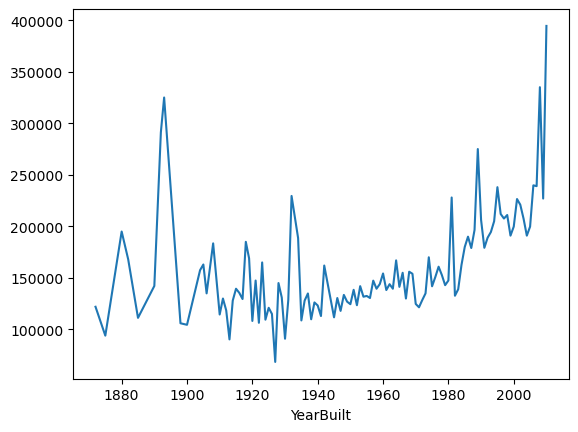

In [13]:
#VARIATION IN THE SALEPRICE OF HOUSES YEARWISE

a.plot()

In [14]:
#GROUPING THE SALEPRICE VALUES ACCORDING TO THE YEAR-SOLD

b = df.groupby(['YrSold'])['SalePrice'].median()
b.first

<bound method NDFrame.first of YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64>

Text(0.5, 1.0, 'price vs yrsold')

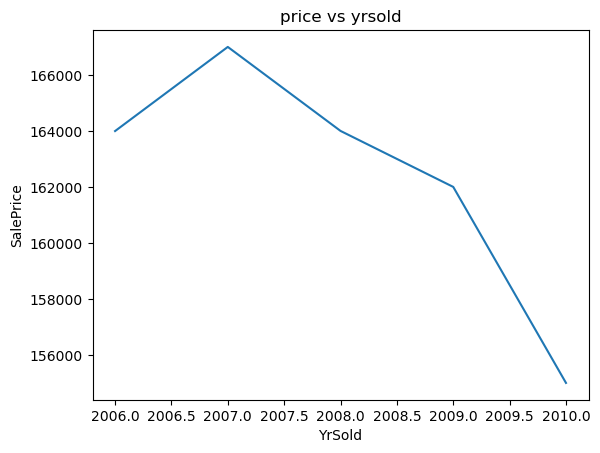

In [15]:
b.plot()
plt.ylabel('SalePrice')
plt.title('price vs yrsold')

We can see that the SalePrice is decreasing with the increasing years which isn't making sense. So we try to take in consideration the relationship between year-sold and year built.

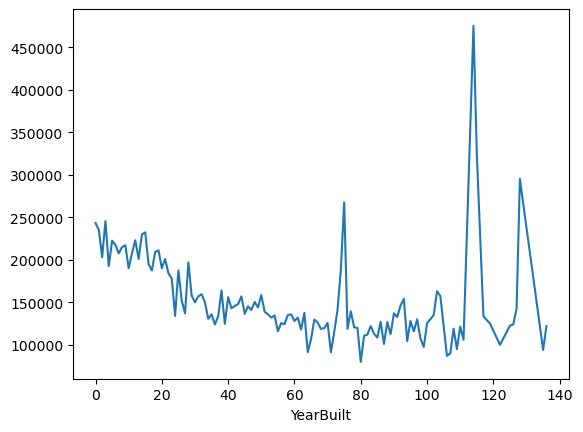

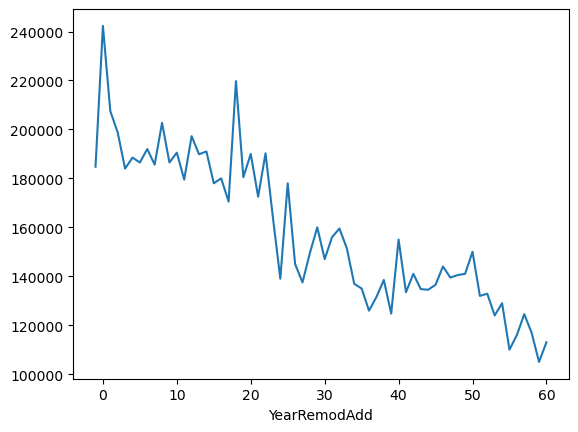

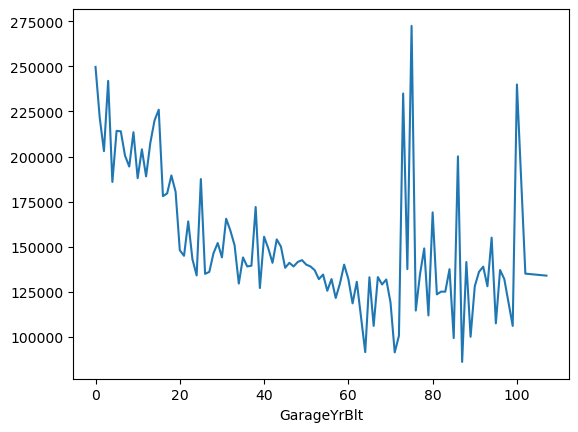

In [16]:
for feature in year_features:
    if feature != 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        data.groupby(feature)['SalePrice'].median().plot()
        plt.show()

Here, we can see the relation between the salesprice and the difference between yrsold and other temporal variables.
We see that as the difference increases, theprice of the house goes down which is expected generally.

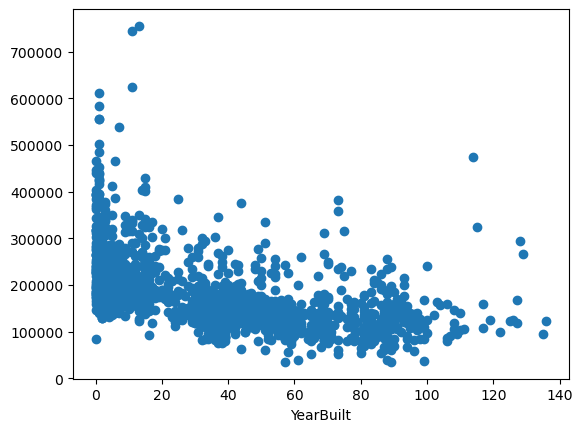

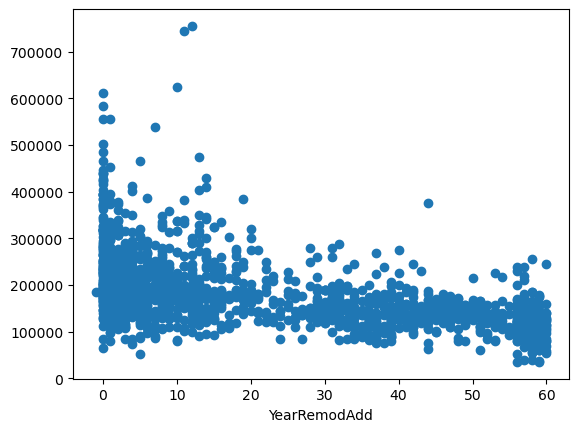

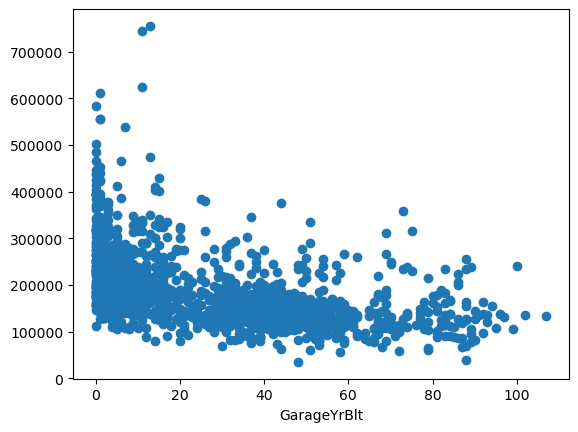

In [17]:
for feature in year_features:
    if feature != 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.show()

We see the same relation with the scatter-plots also.

In [18]:
for feature in ["YearBuilt",'YearRemodAdd','GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]
    

In [19]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave   NaN      Reg  \
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5          5  \
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1            31     Gable  CompShg     MetalSd     MetalSd        NaN   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0         NaN  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [20]:
#CREATING THE LIST OF DISCRETE FEATURES IN THE DATAFRAME

discrete_features = [features for features in df if len(df[features].unique())<25 and features not in year_features+['Id']]
discrete_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [21]:
df[discrete_features]

MSSubClass MSZoning Street Alley LotShape LandContour Utilities   
0             60       RL   Pave   NaN      Reg         Lvl    AllPub  \
1             20       RL   Pave   NaN      Reg         Lvl    AllPub   
2             60       RL   Pave   NaN      IR1         Lvl    AllPub   
3             70       RL   Pave   NaN      IR1         Lvl    AllPub   
4             60       RL   Pave   NaN      IR1         Lvl    AllPub   
...          ...      ...    ...   ...      ...         ...       ...   
1455          60       RL   Pave   NaN      Reg         Lvl    AllPub   
1456          20       RL   Pave   NaN      Reg         Lvl    AllPub   
1457          70       RL   Pave   NaN      Reg         Lvl    AllPub   
1458          20       RL   Pave   NaN      Reg         Lvl    AllPub   
1459          20       RL   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Condition1 Condition2 BldgType HouseStyle   
0       Inside       Gtl       Norm       Norm     1Fam     2Story  \
1          FR2       Gtl      Feedr       Norm     1Fam     1Story   
2       Inside       Gtl       Norm       Norm     1Fam     2Story   
3       Corner       Gtl       Norm       Norm     1Fam     2Story   
4          FR2       Gtl       Norm       Norm     1Fam     2Story   
...        ...       ...        ...        ...      ...        ...   
1455    Inside       Gtl       Norm       Norm     1Fam     2Story   
1456    Inside       Gtl       Norm       Norm     1Fam     1Story   
1457    Inside       Gtl       Norm       Norm     1Fam     2Story   
1458    Inside       Gtl       Norm       Norm     1Fam     1Story   
1459    Inside       Gtl       Norm       Norm     1Fam     1Story   

      OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd   
0               7            5     Gable  CompShg     VinylSd     VinylSd  \
1               6            8     Gable  CompShg     MetalSd     MetalSd   
2               7            5     Gable  CompShg     VinylSd     VinylSd   
3               7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4               8            5     Gable  CompShg     VinylSd     VinylSd   
...           ...          ...       ...      ...         ...         ...   
1455            6            5     Gable  CompShg     VinylSd     VinylSd   
1456            6            6     Gable  CompShg     Plywood     Plywood   
1457            7            9     Gable  CompShg     CemntBd     CmentBd   
1458            5            6       Hip  CompShg     MetalSd     MetalSd   
1459            5            6     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       BrkFace        Gd        TA      PConc       Gd       TA           No  \
1           NaN        TA        TA     CBlock       Gd       TA           Gd   
2       BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3           NaN        TA        TA     BrkTil       TA       Gd           No   
4       BrkFace        Gd        TA      PConc       Gd       TA           Av   
...         ...       ...       ...        ...      ...      ...          ...   
1455        NaN        TA        TA      PConc       Gd       TA           No   
1456      Stone        TA        TA     CBlock       Gd       TA           No   
1457        NaN        Ex        Gd      Stone       TA       Gd           No   
1458        NaN        TA        TA     CBlock       TA       TA           Mn   
1459        NaN        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical   
0             GLQ          Unf    GasA        Ex          Y      SBrkr  \
1             ALQ          Unf    GasA        Ex          Y      SBrkr   
2             GLQ          Unf    GasA        Ex          Y      SBrkr   
3             ALQ          Unf    GasA        Gd          Y      SBrkr   
4             GLQ   

MSSubClass


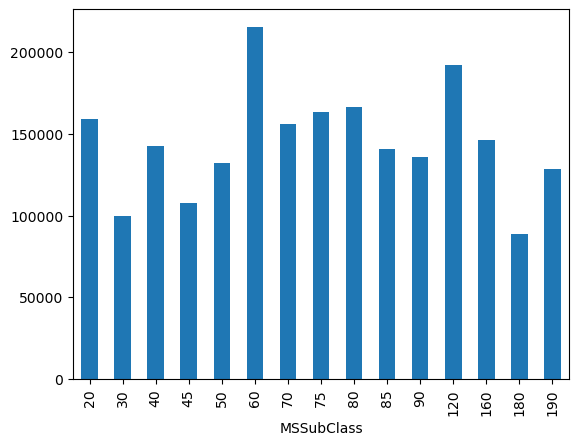

MSZoning


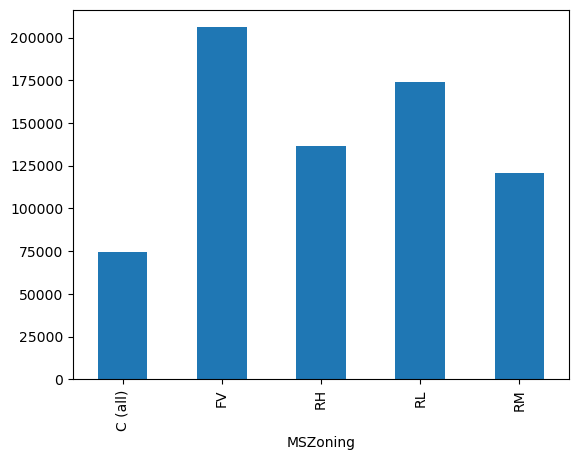

Street


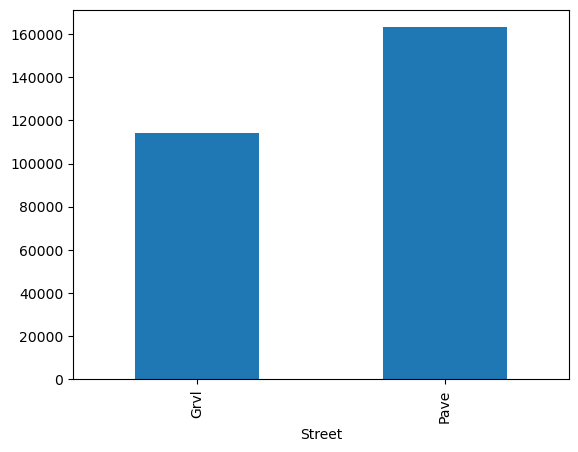

Alley


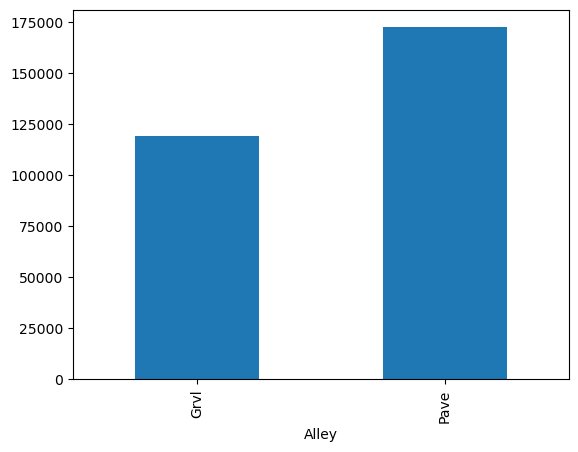

LotShape


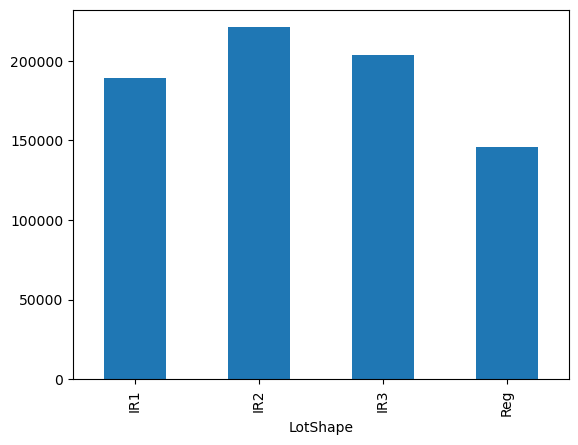

LandContour


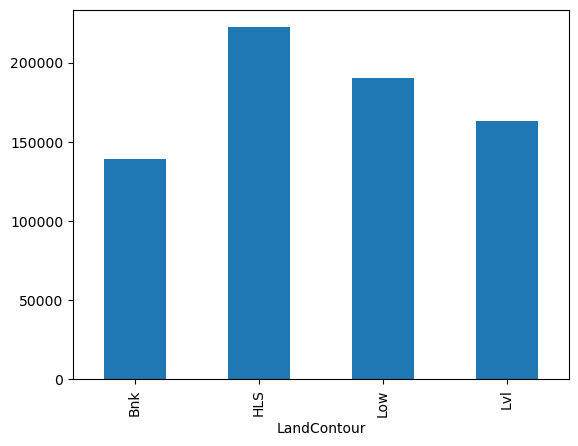

Utilities


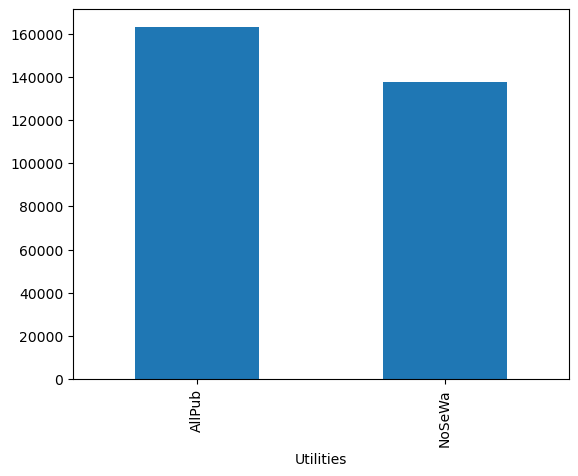

LotConfig


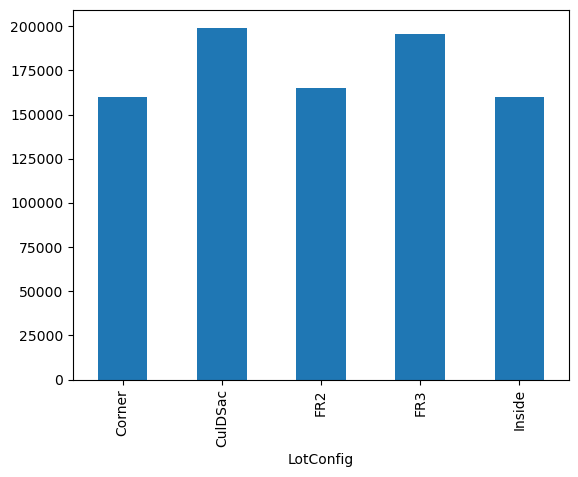

LandSlope


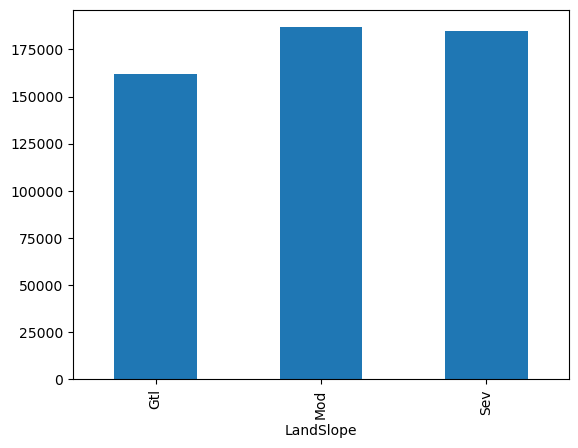

Condition1


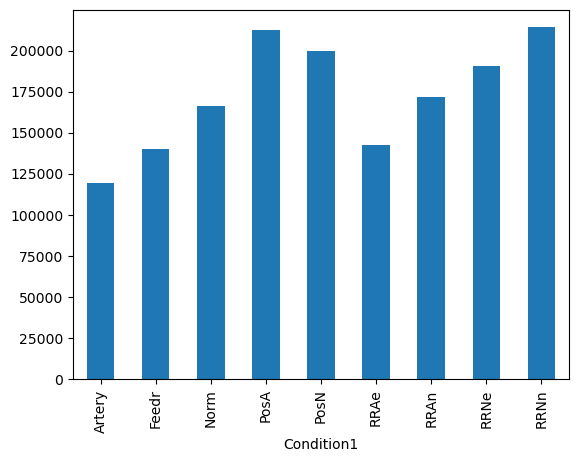

Condition2


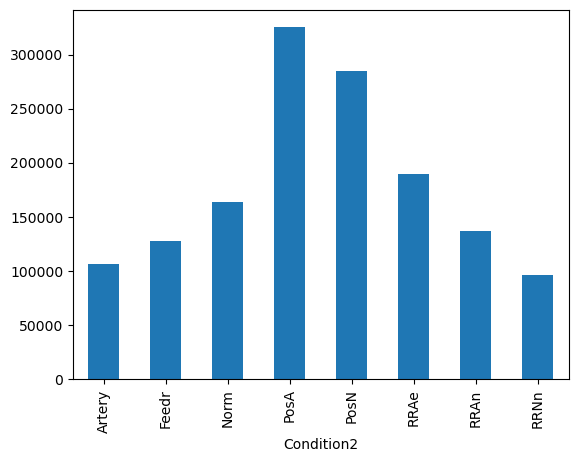

BldgType


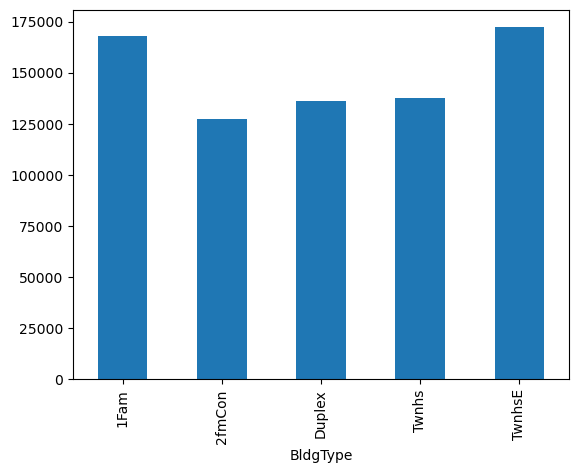

HouseStyle


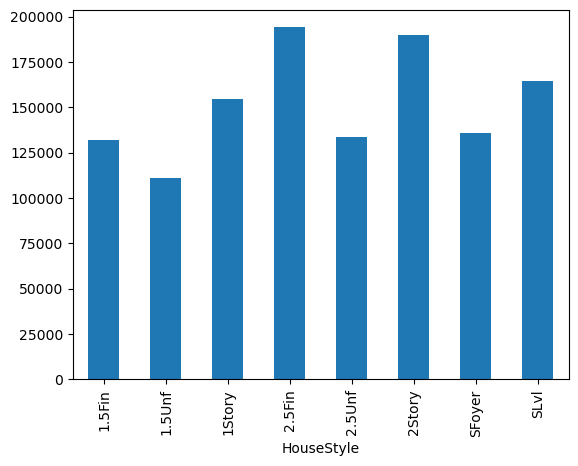

OverallQual


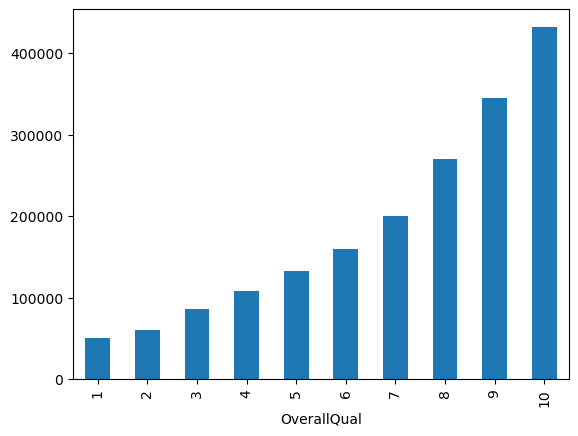

OverallCond


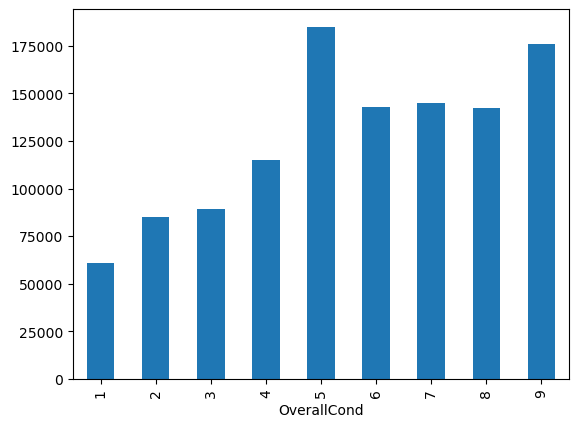

RoofStyle


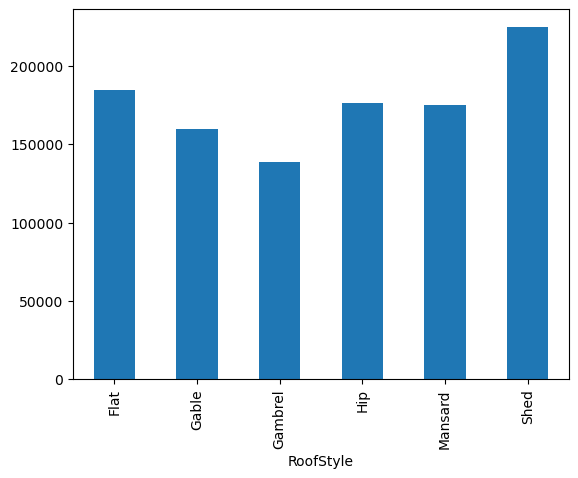

RoofMatl


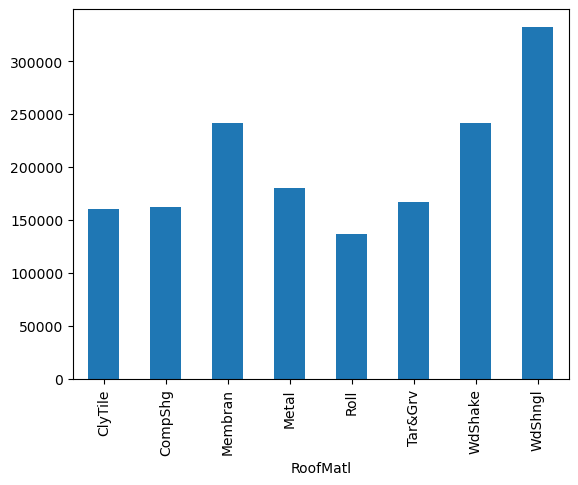

Exterior1st


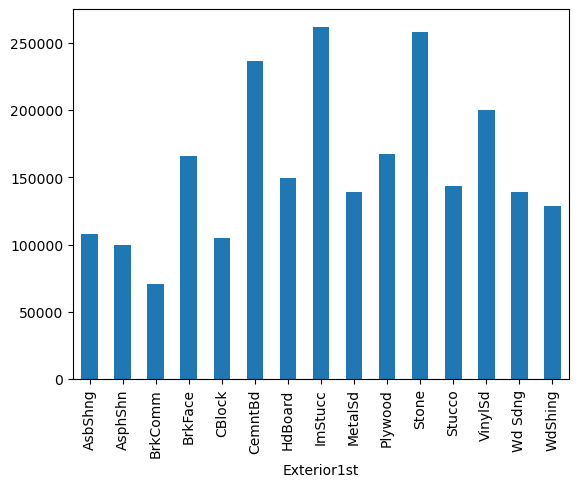

Exterior2nd


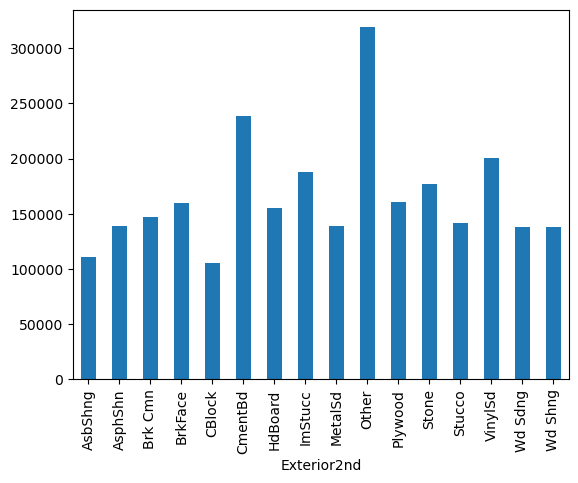

MasVnrType


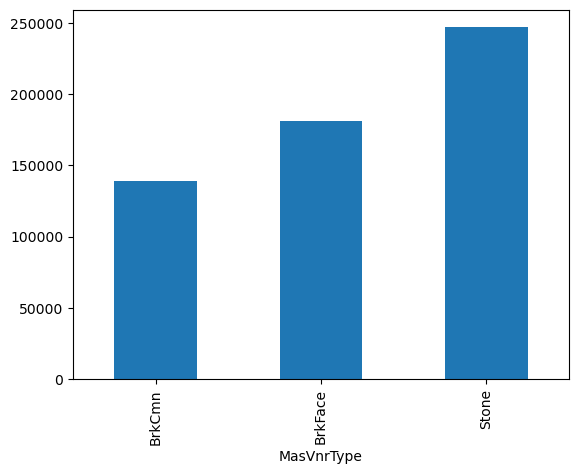

ExterQual


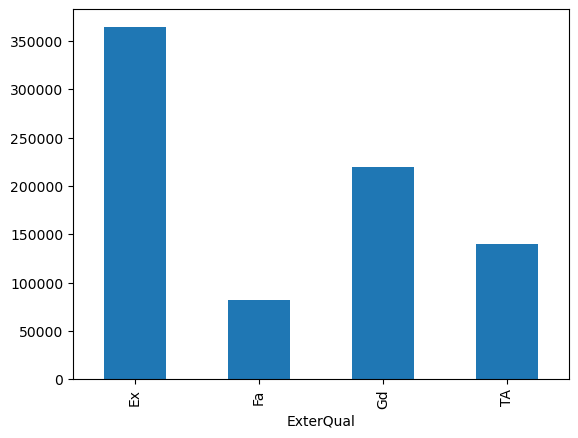

ExterCond


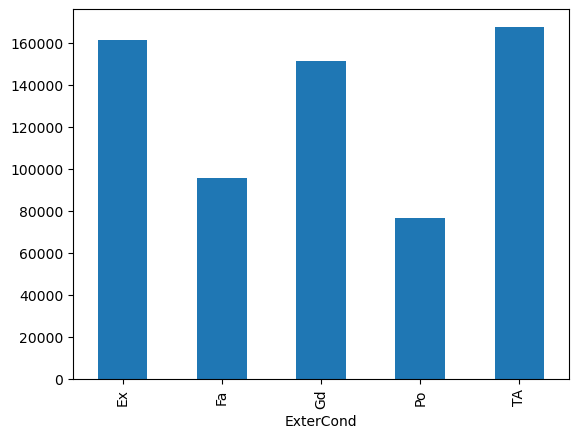

Foundation


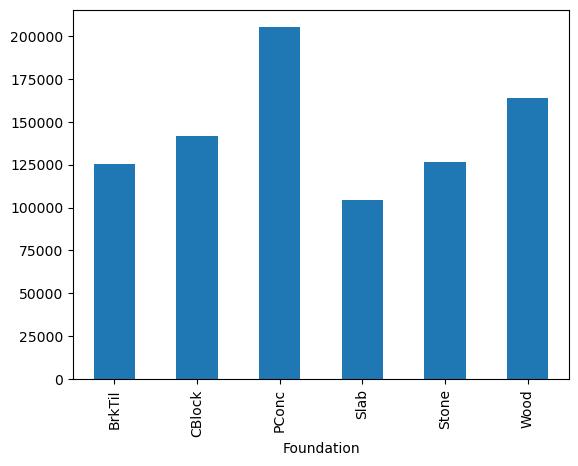

BsmtQual


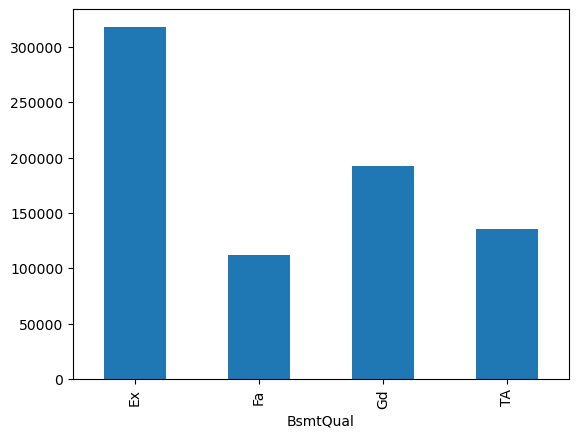

BsmtCond


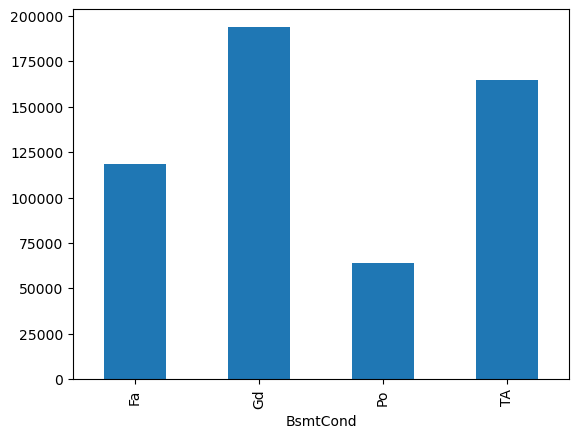

BsmtExposure


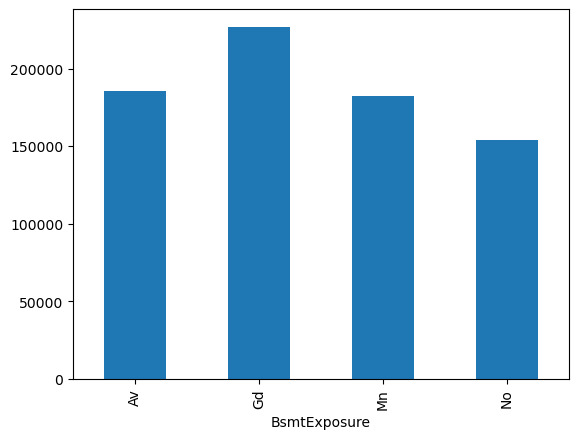

BsmtFinType1


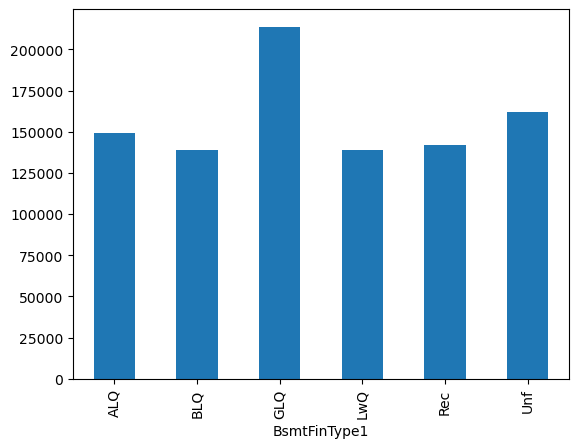

BsmtFinType2


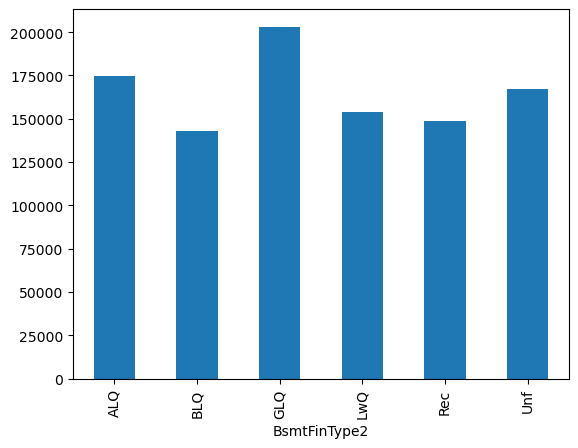

Heating


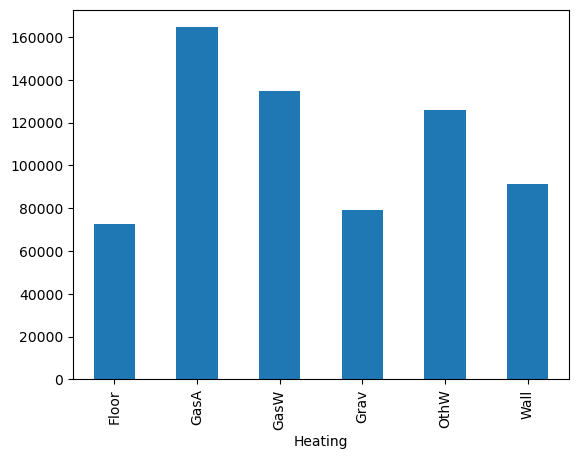

HeatingQC


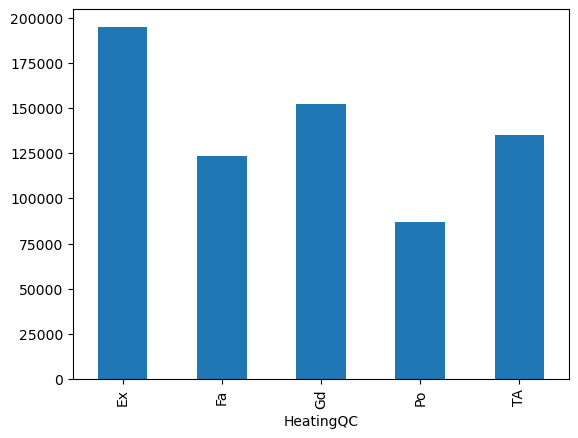

CentralAir


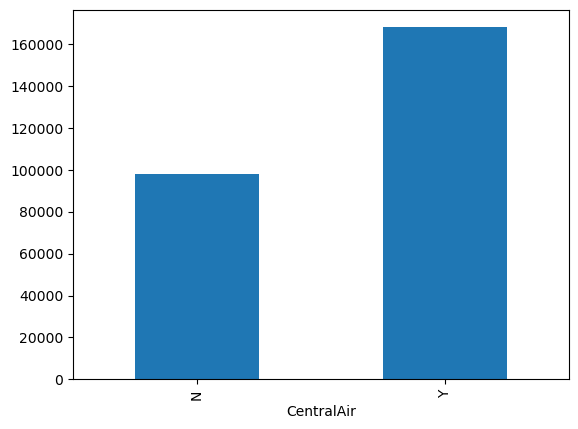

Electrical


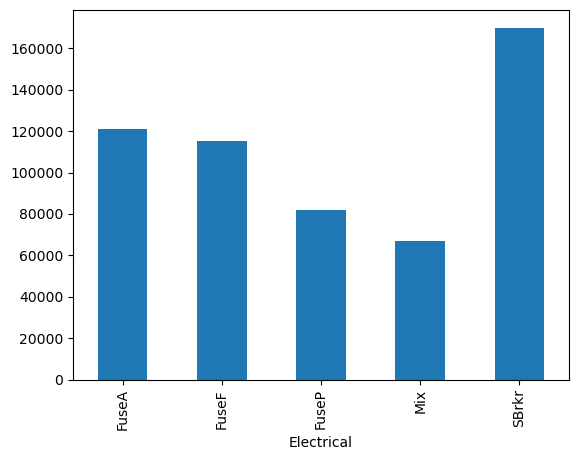

LowQualFinSF


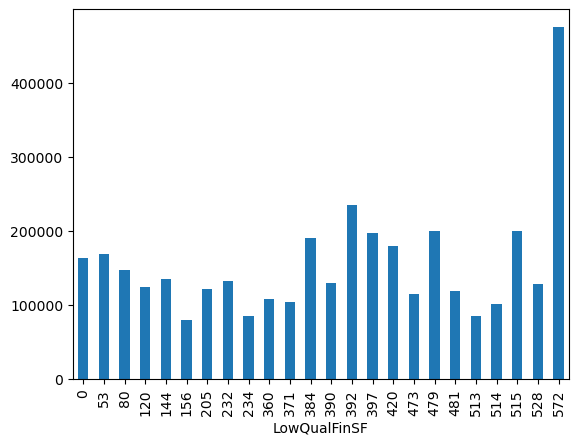

BsmtFullBath


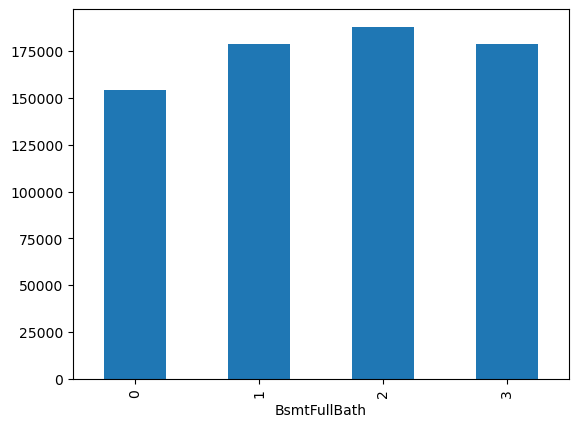

BsmtHalfBath


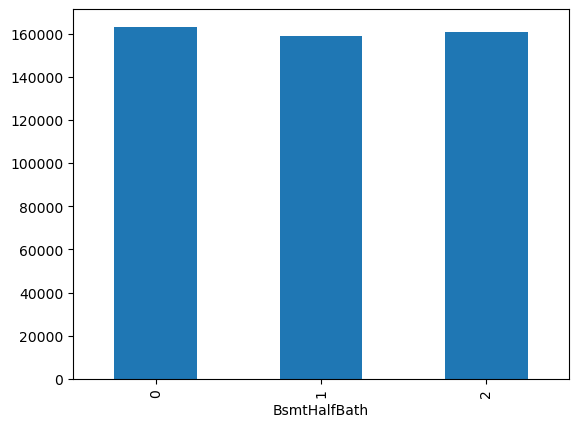

FullBath


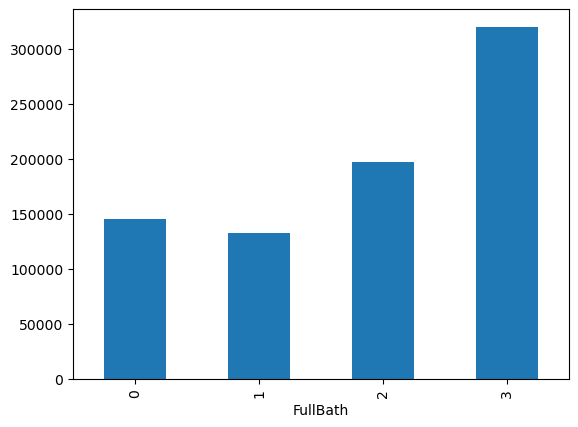

HalfBath


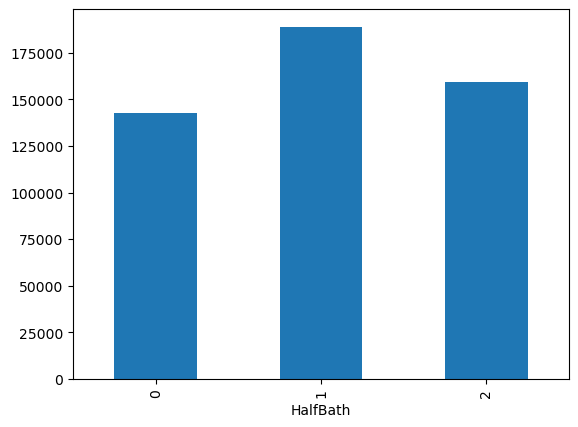

BedroomAbvGr


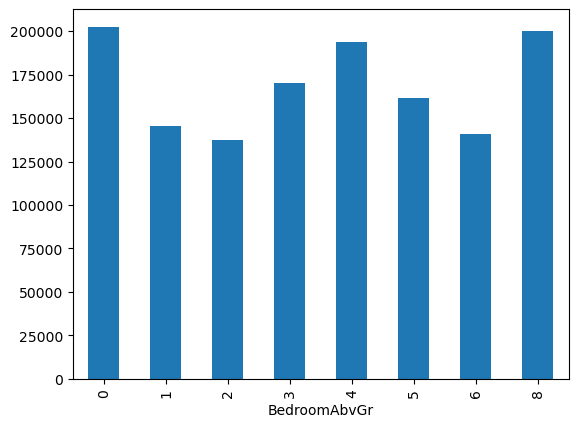

KitchenAbvGr


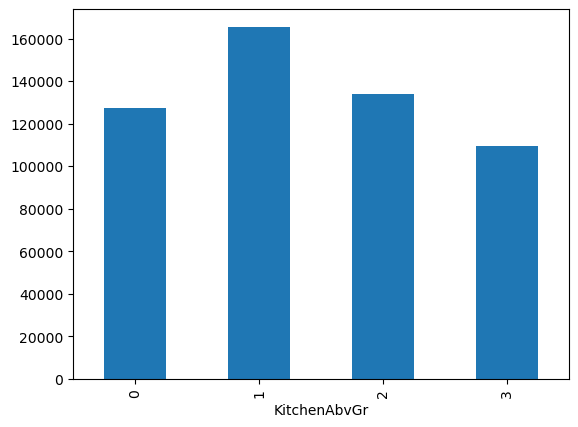

KitchenQual


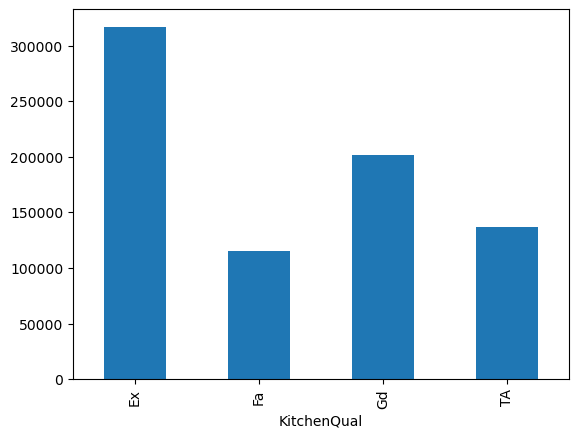

TotRmsAbvGrd


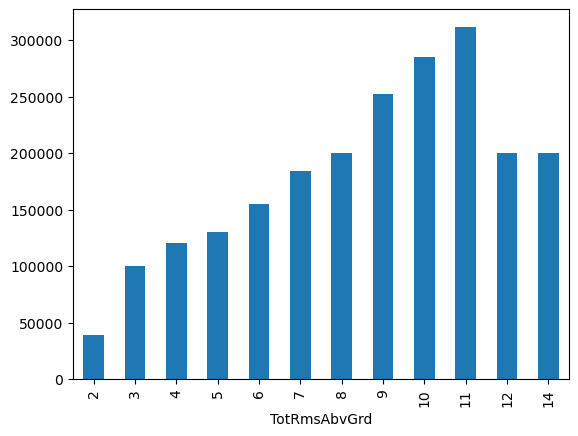

Functional


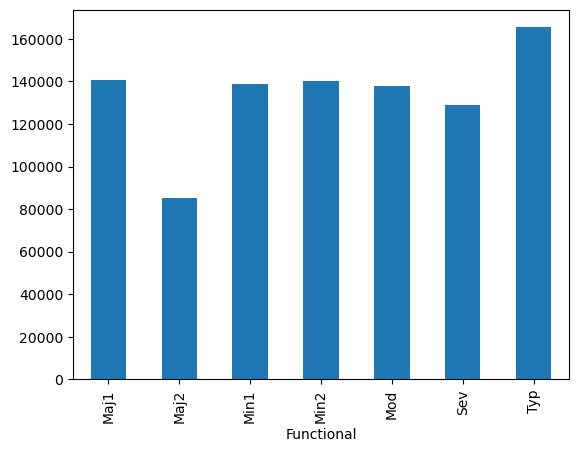

Fireplaces


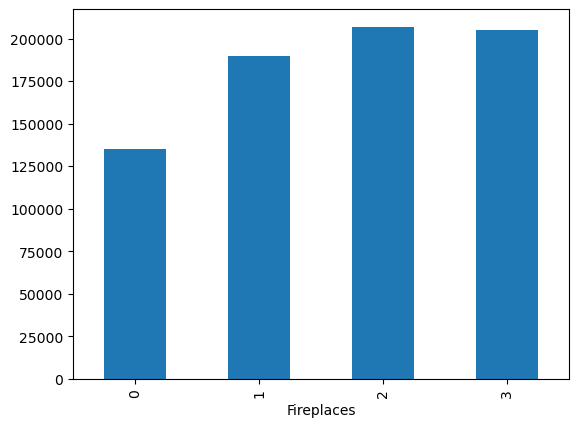

FireplaceQu


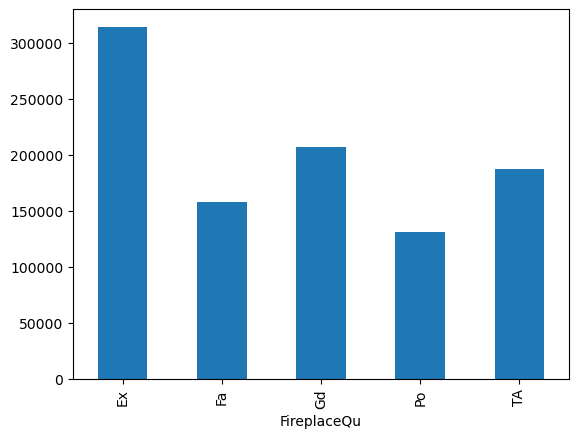

GarageType


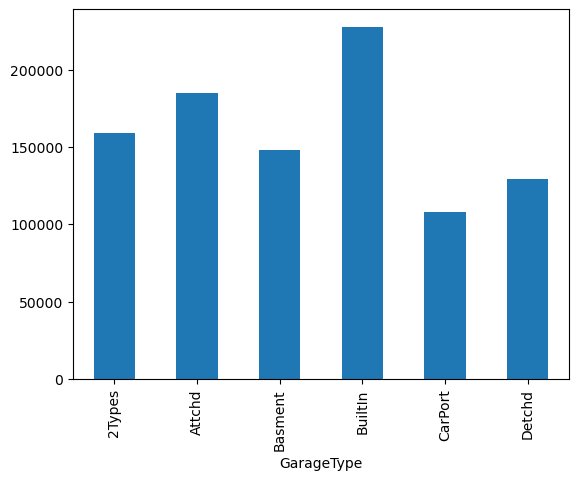

GarageFinish


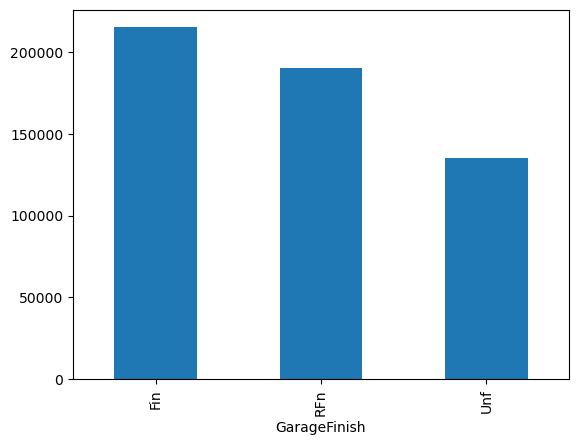

GarageCars


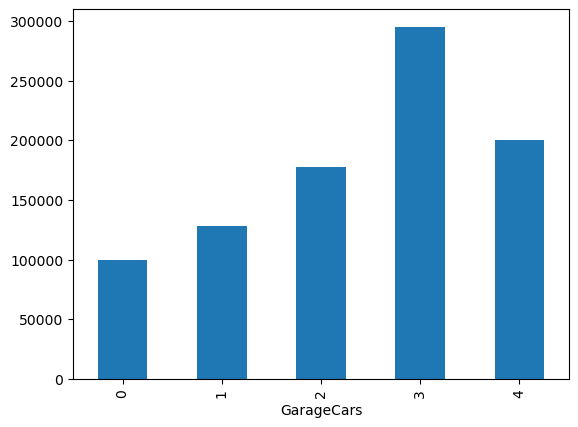

GarageQual


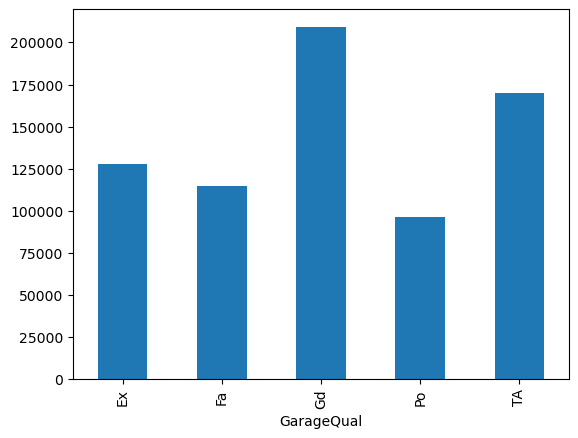

GarageCond


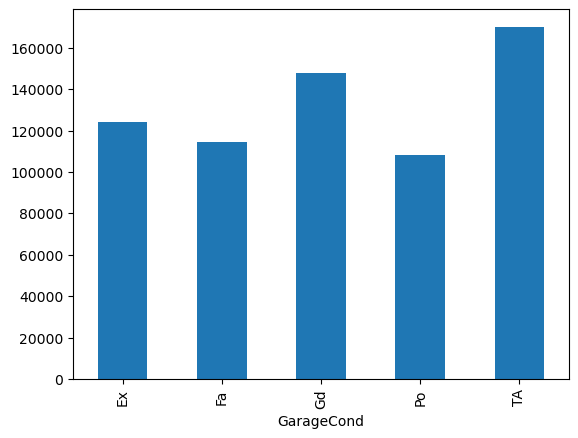

PavedDrive


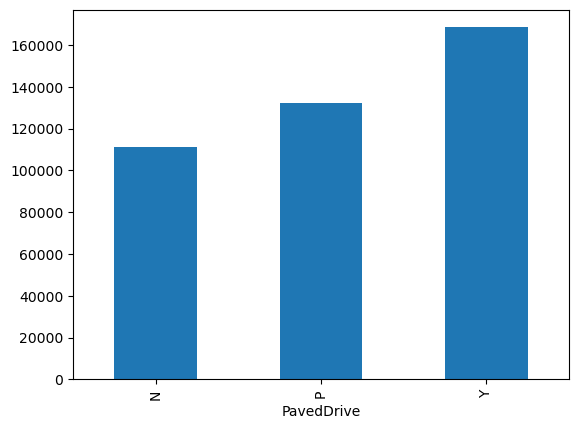

3SsnPorch


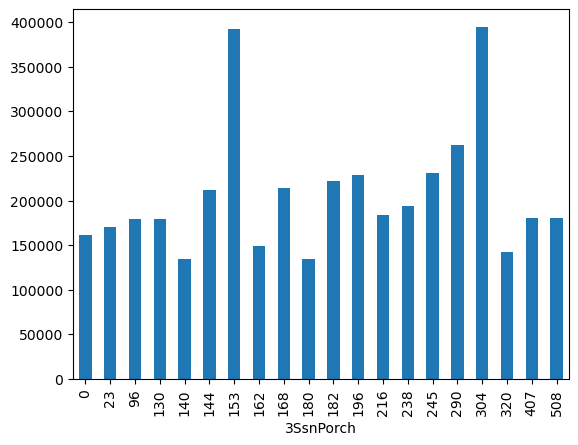

PoolArea


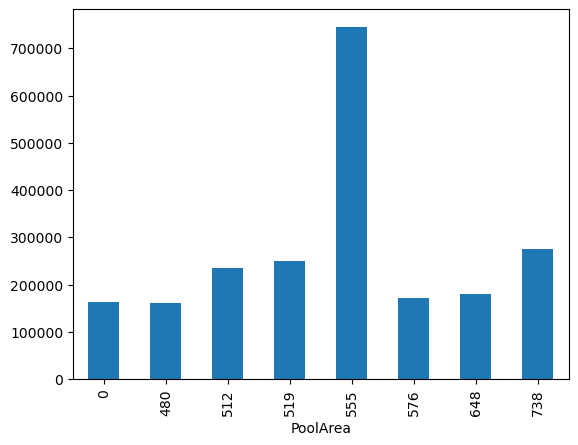

PoolQC


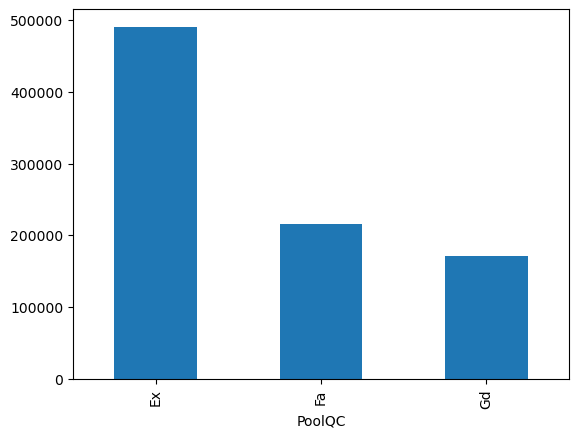

Fence


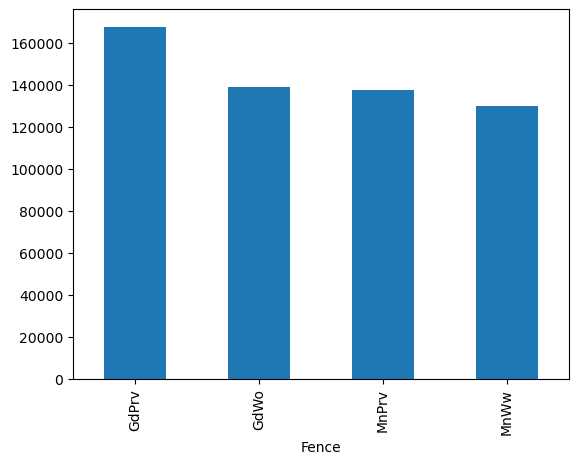

MiscFeature


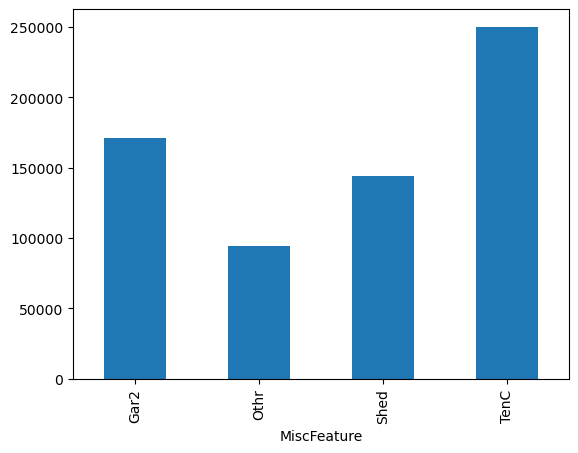

MiscVal


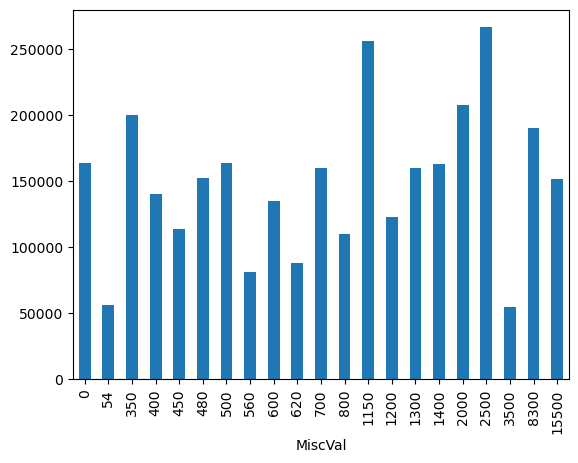

MoSold


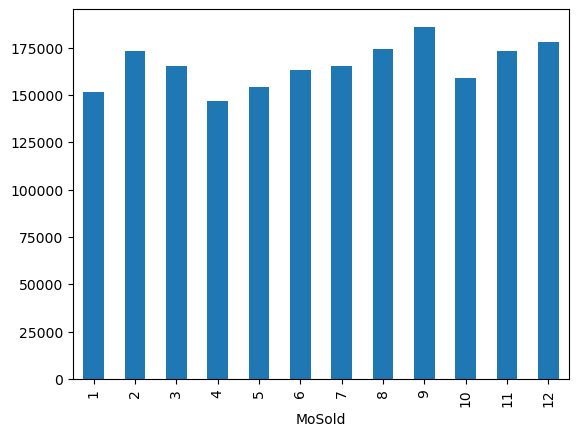

SaleType


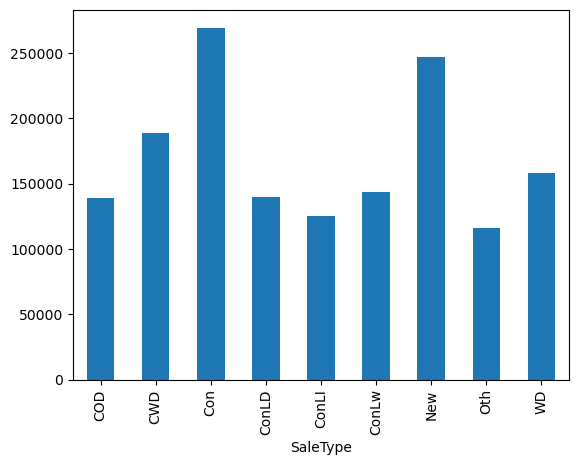

SaleCondition


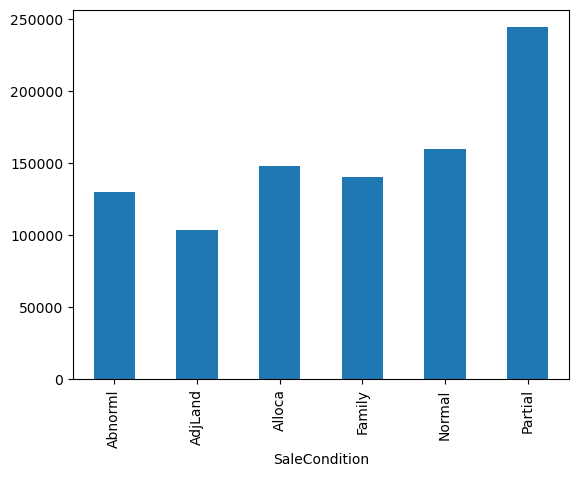

In [22]:
#PLOTTING THE RELATION BETWEEN DISCRETE FEATURES AND SALEPRICE 

for feature in discrete_features:
    print(feature)
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

In [23]:
#CREATING A LIST OF CONTINUOUS FEATURES FROM THE DATAFRAME

continuous_features = [feature for feature in num_features if feature not in discrete_features and feature not in year_features +['Id']]
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

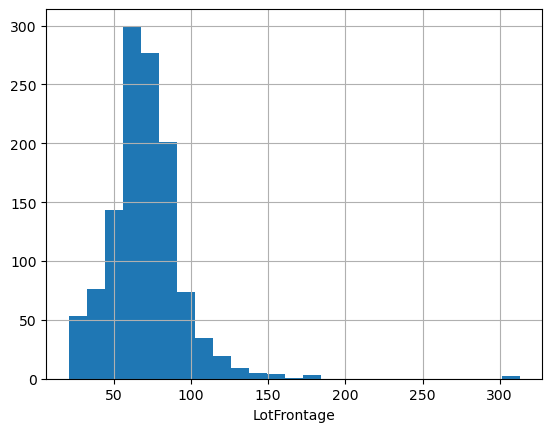

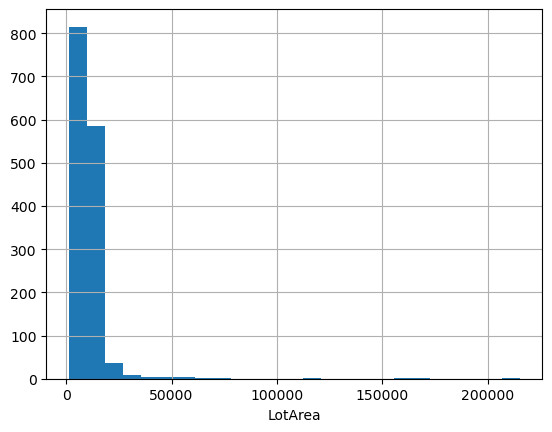

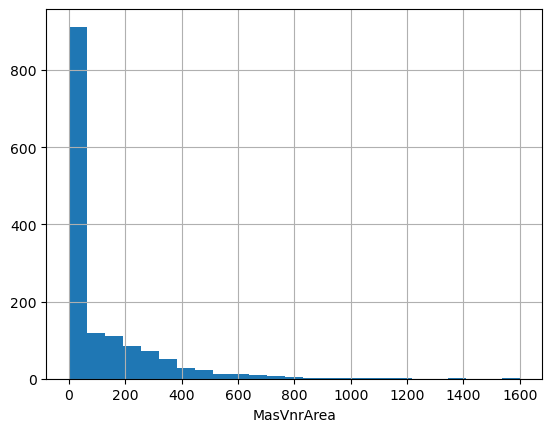

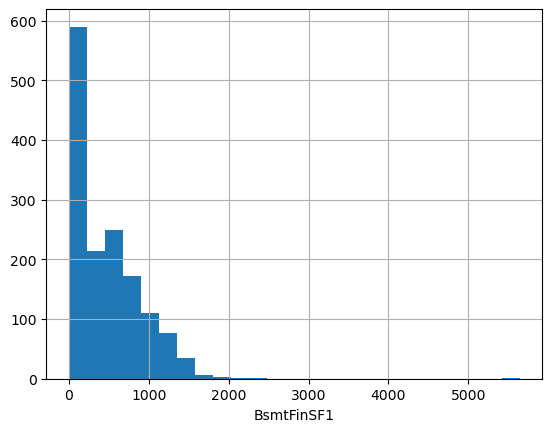

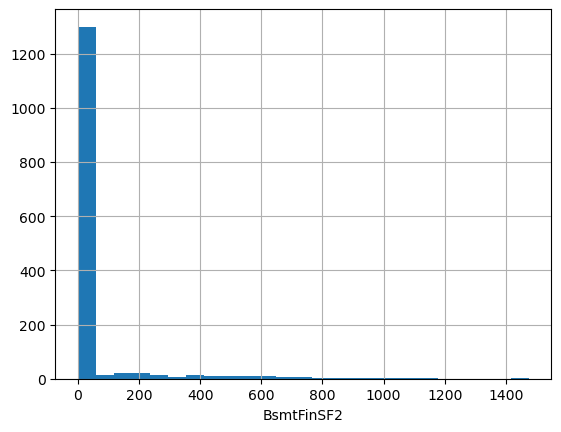

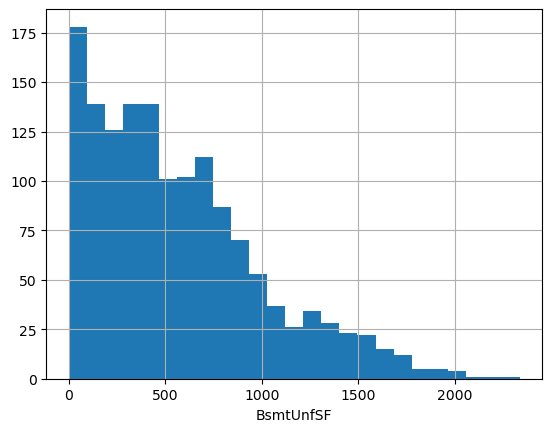

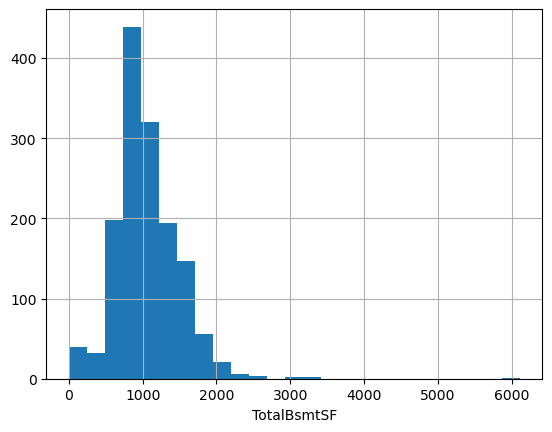

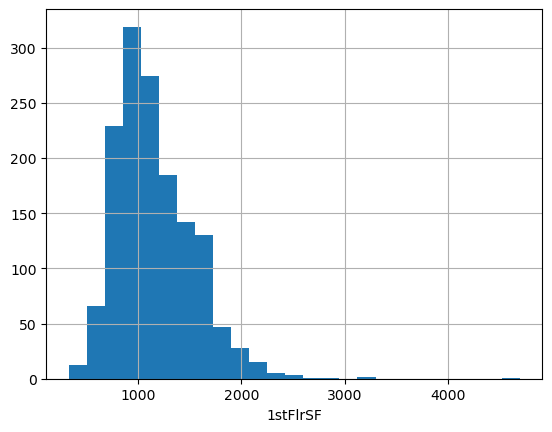

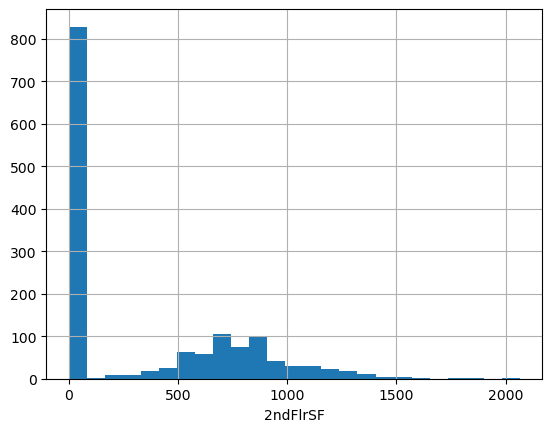

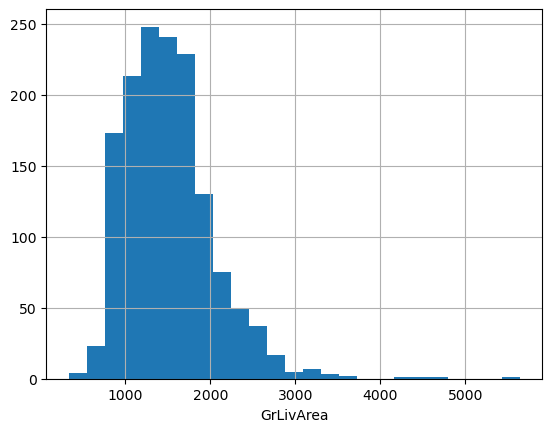

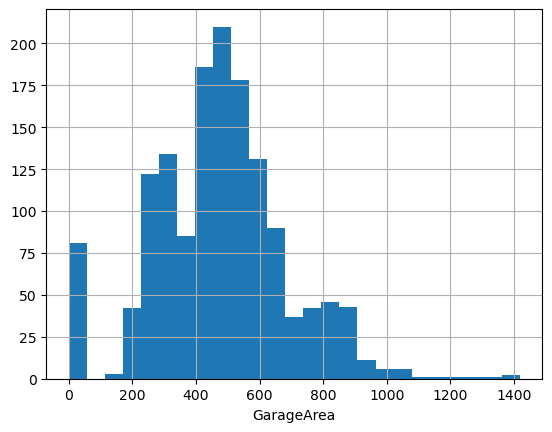

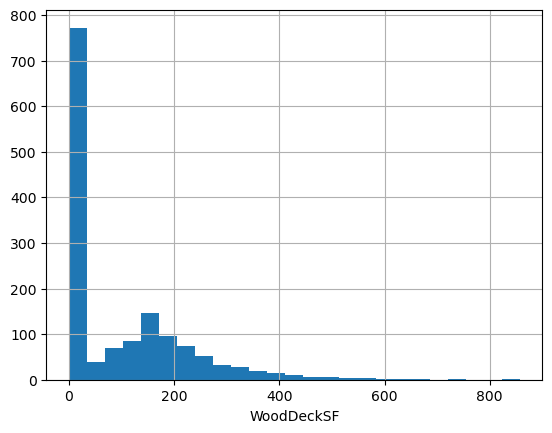

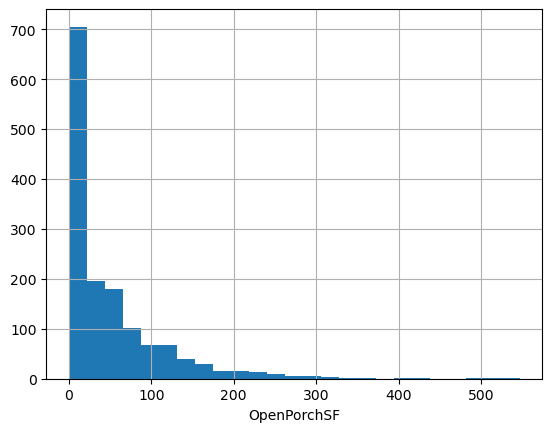

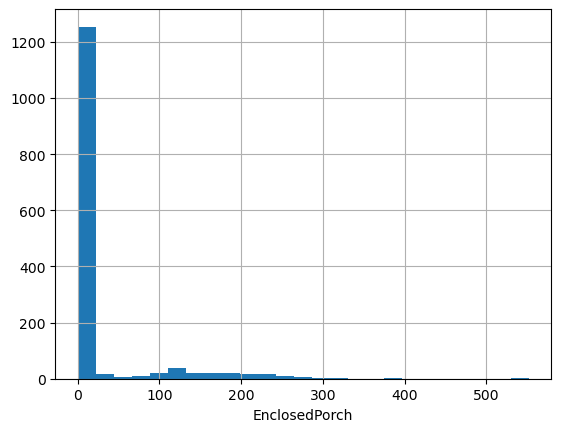

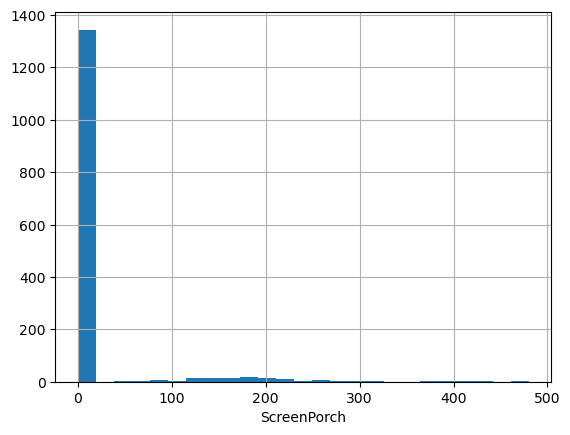

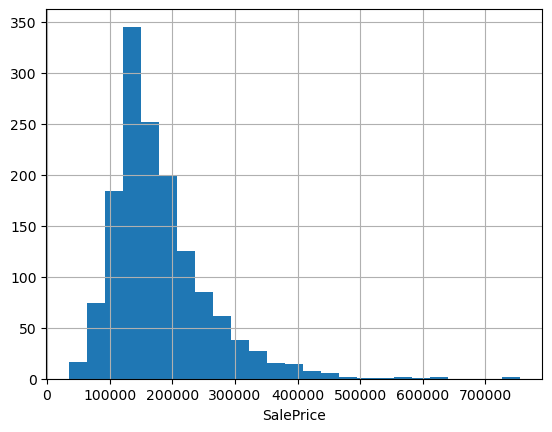

In [24]:
#PLOTTING THE DISTRIBUTION OF CONTINUOUS FEATURES TO SEE IF ANY OF THE FEATURE HAS A SKEWED DISTRIBUTION.

#IF THERE IS A SKEWED DISTRIBUTION THEN WE CAN APPLY SCALING AND REMOVE OUTLIERS TO MAKE IT MORE LIKE A GAUSSIAN DISTRIBUTION.

for feature in continuous_features:
    data = df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

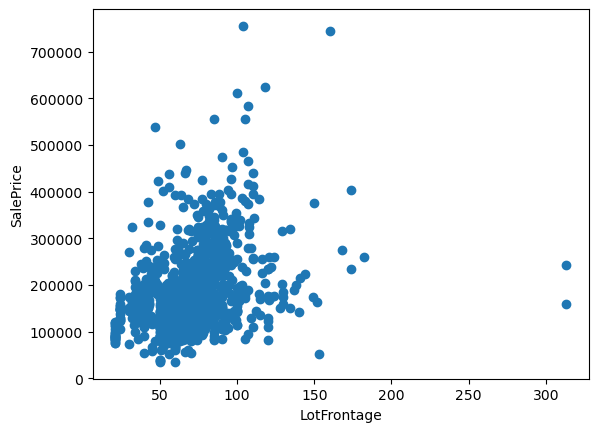

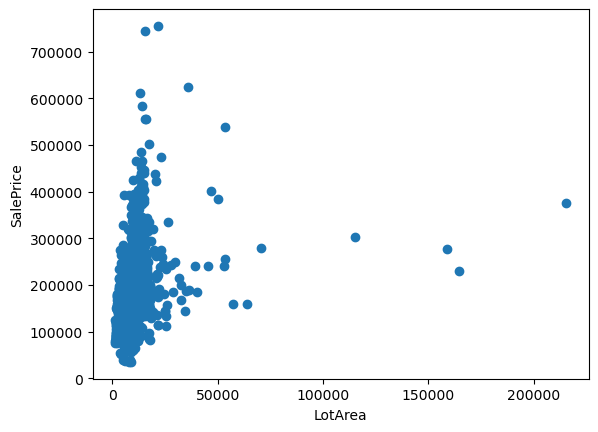

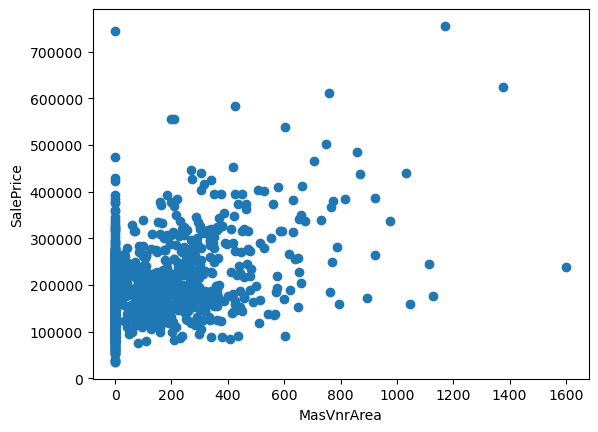

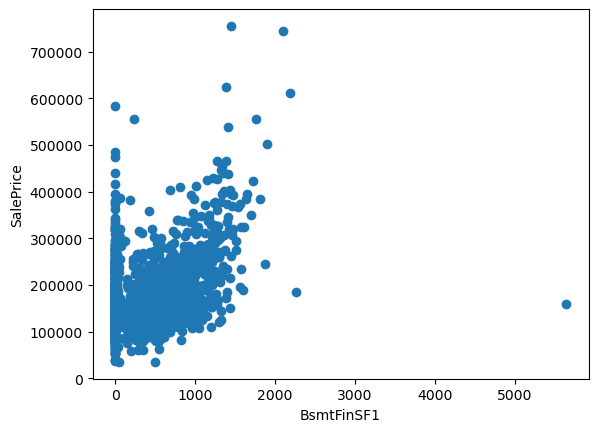

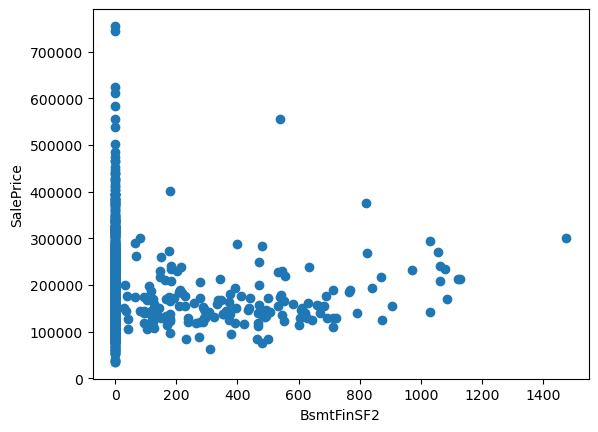

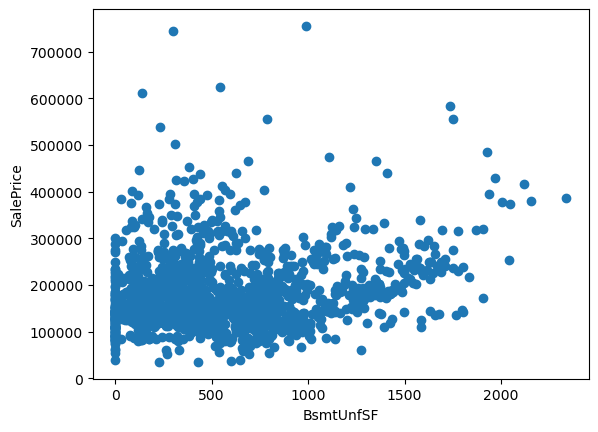

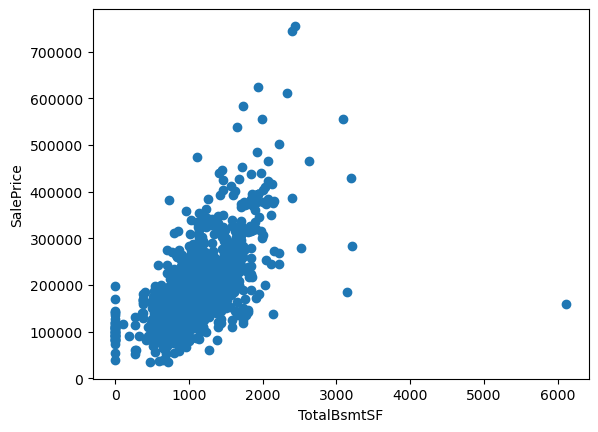

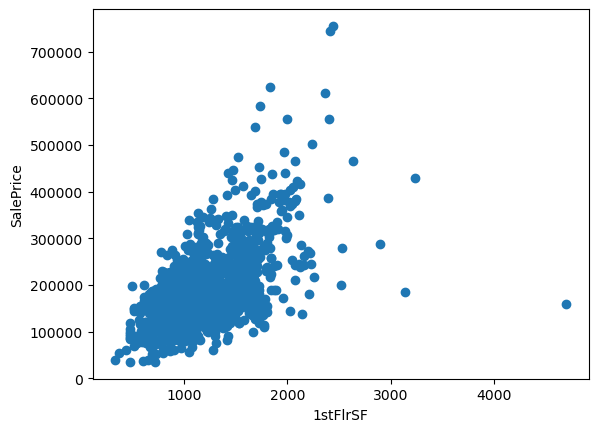

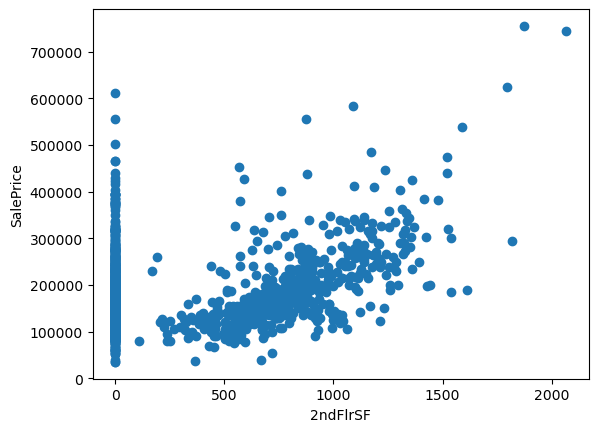

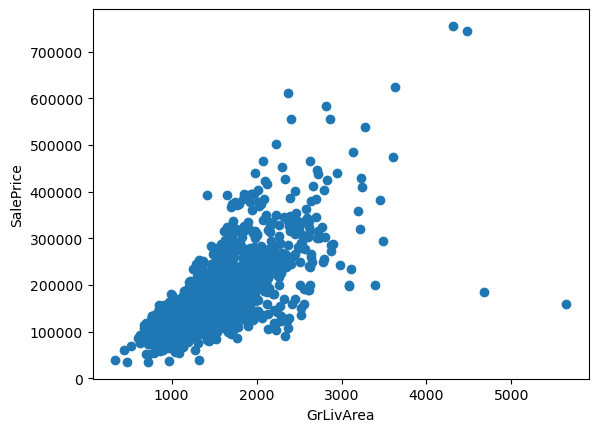

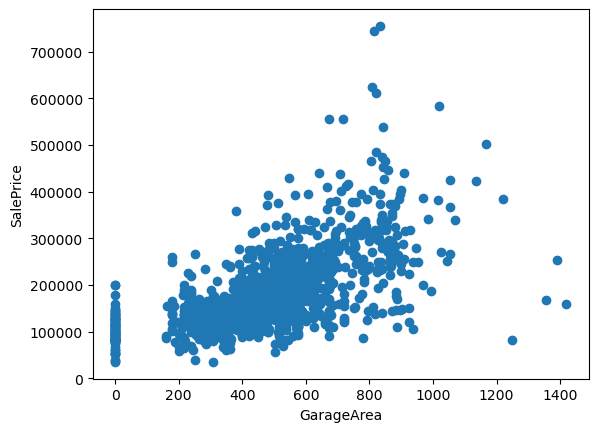

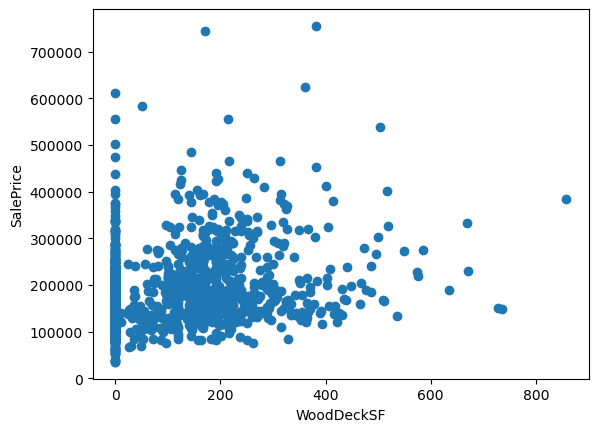

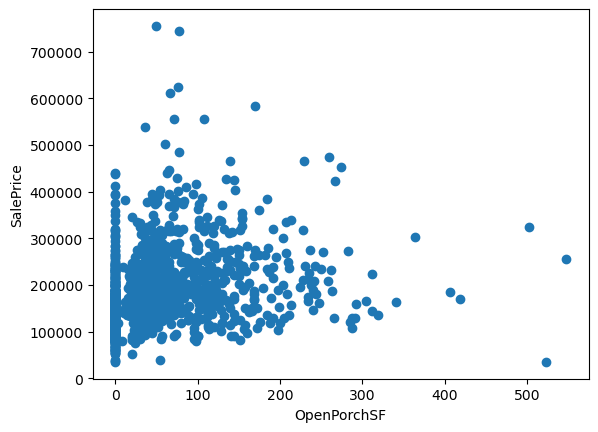

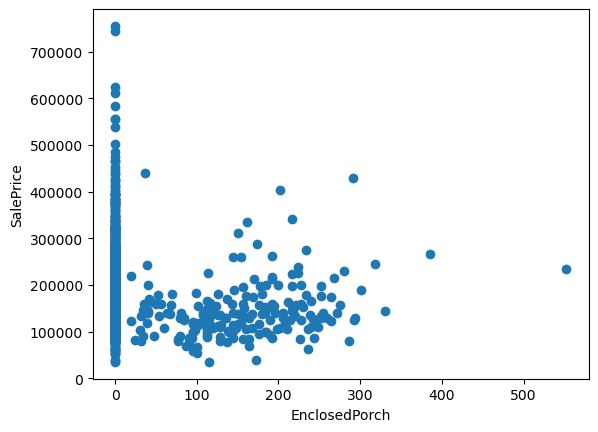

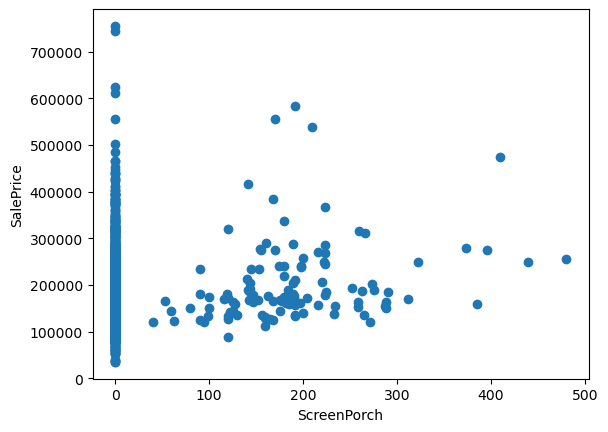

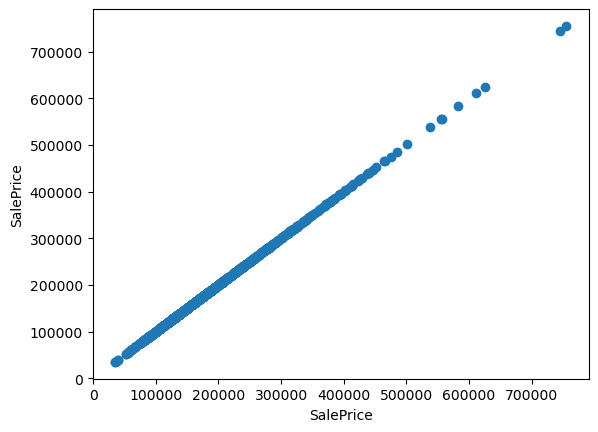

In [25]:
for feature in continuous_features:
    plt.scatter(df[feature],df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    
    plt.show()

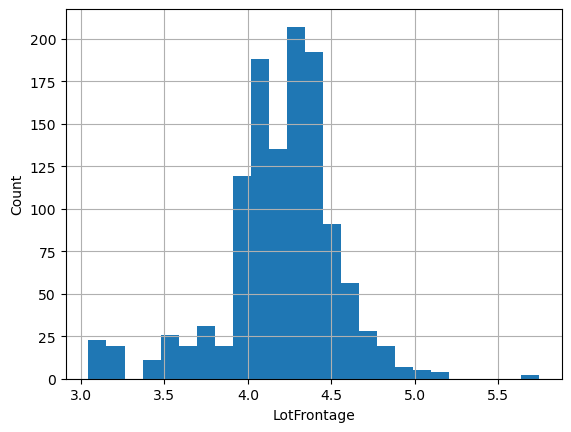

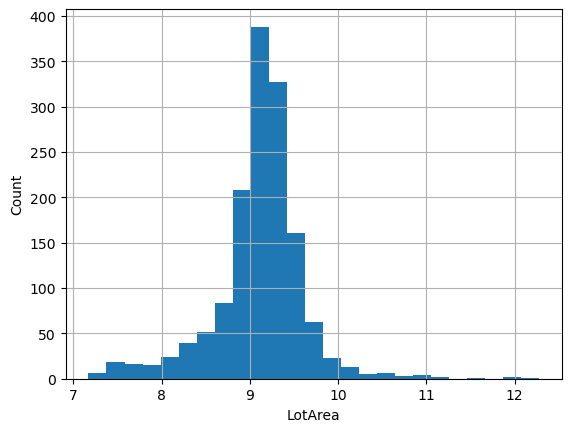

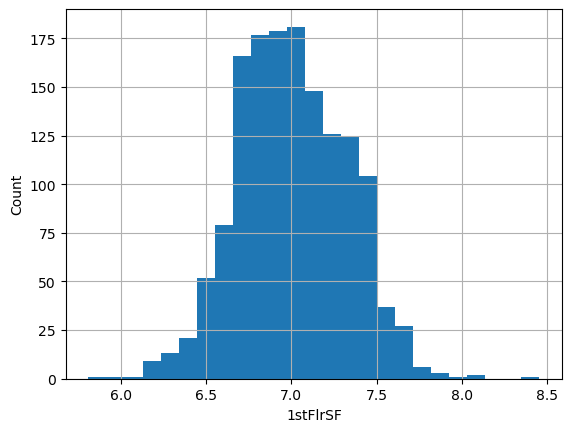

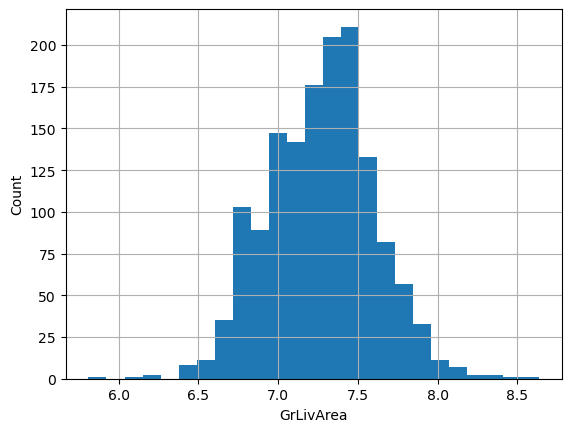

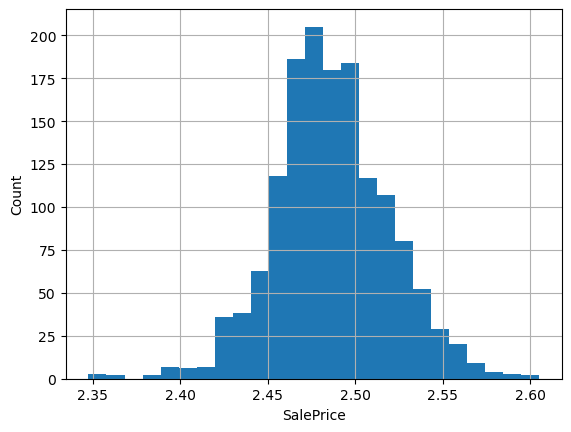

In [26]:
for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        data[feature].hist(bins =25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

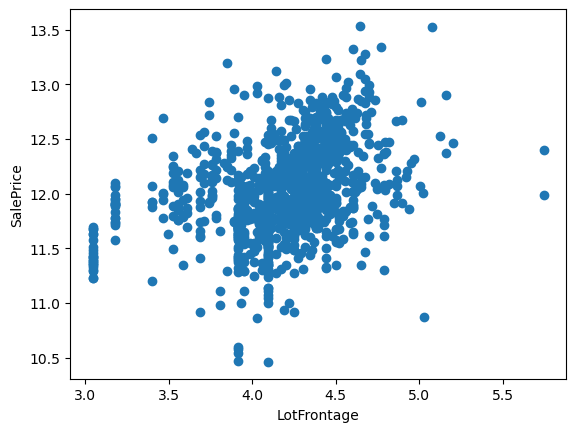

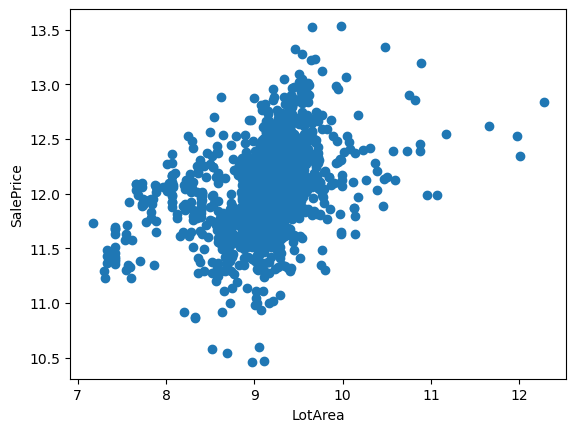

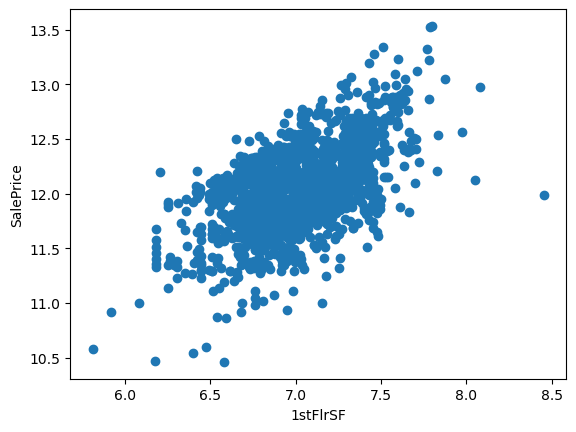

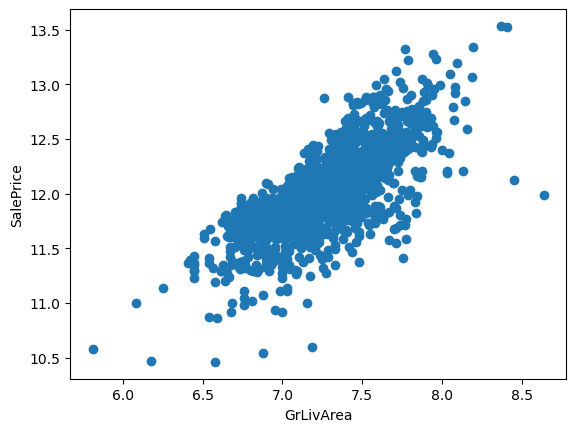

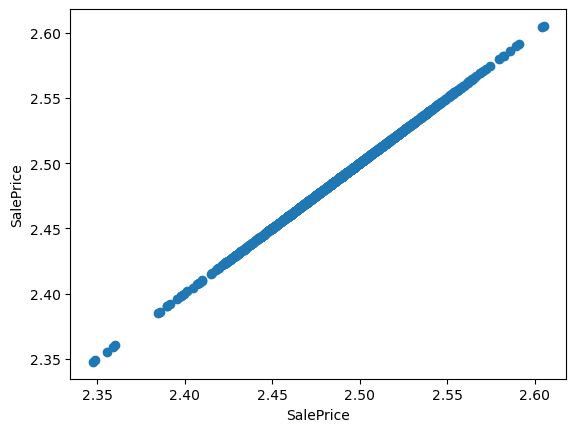

In [27]:
#DATA PLOTTING AFTER CONVERTING INTO LOG-NORMAL DISTRIBUTION


for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

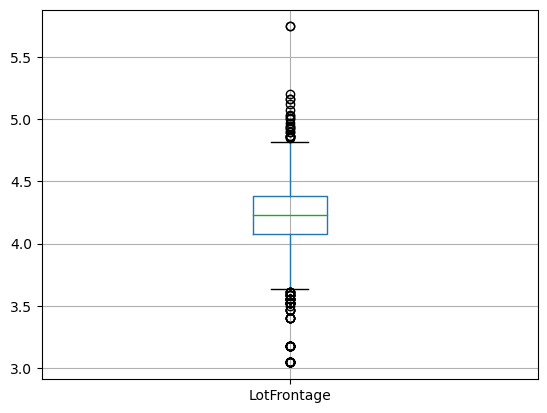

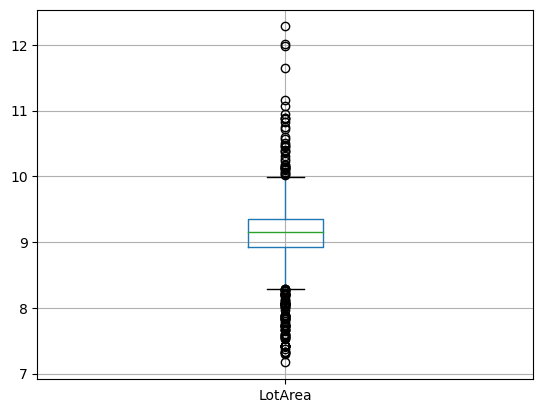

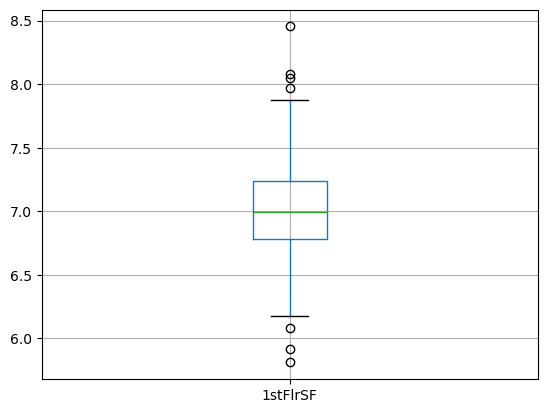

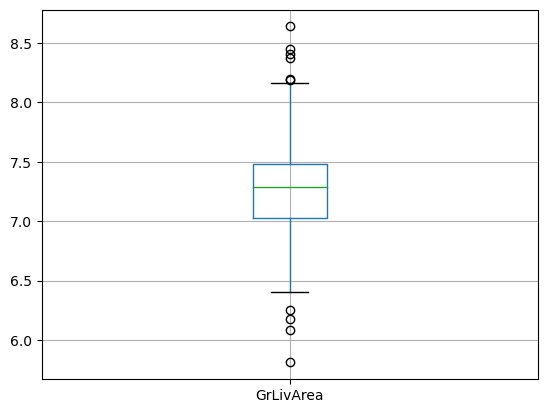

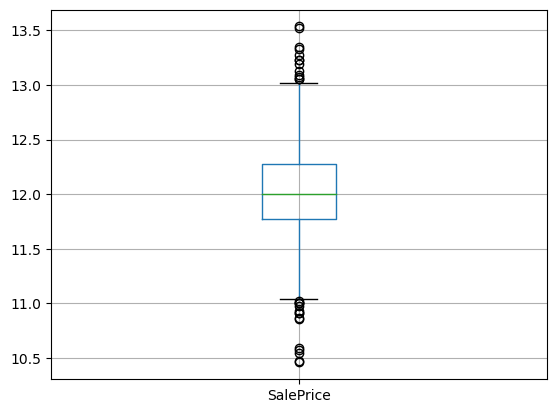

In [28]:
#PLOTTING THE BOXPLOTS TO SEE THE OUTLIERS IN THE DISTRIBUTION OF CONTINUOUS FEATURES IN THE DATAFRAME

for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        #data['SalePrice'] = np.log(data['SalePrice'])
        data.boxplot(column = feature)
        plt.show()

In [29]:
#CREATING THE LIST OF CATEGORICAL FEATURES

categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope   
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl  \
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl   
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg  \
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual   
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd  \
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC   
0       TA           No          GLQ          Unf    GasA        Ex  \
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType   
0          Y      SBrkr          Gd        Typ         NaN     Attchd  \
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature   
0          RFn         TA         TA          Y    NaN   NaN         NaN  \
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [31]:
for feature in categorical_features:
    print(feature," --> ",df[feature].unique())
    print('\n')

MSZoning  -->  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Street  -->  ['Pave' 'Grvl']


Alley  -->  [nan 'Grvl' 'Pave']


LotShape  -->  ['Reg' 'IR1' 'IR2' 'IR3']


LandContour  -->  ['Lvl' 'Bnk' 'Low' 'HLS']


Utilities  -->  ['AllPub' 'NoSeWa']


LotConfig  -->  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LandSlope  -->  ['Gtl' 'Mod' 'Sev']


Neighborhood  -->  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Condition1  -->  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition2  -->  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


BldgType  -->  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


HouseStyle  -->  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


RoofStyle  -->  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofMat

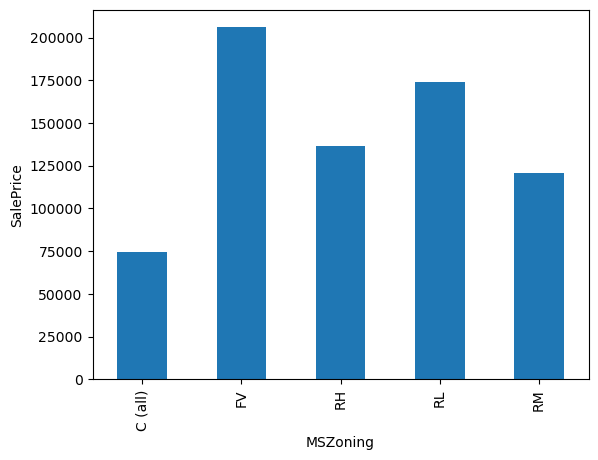

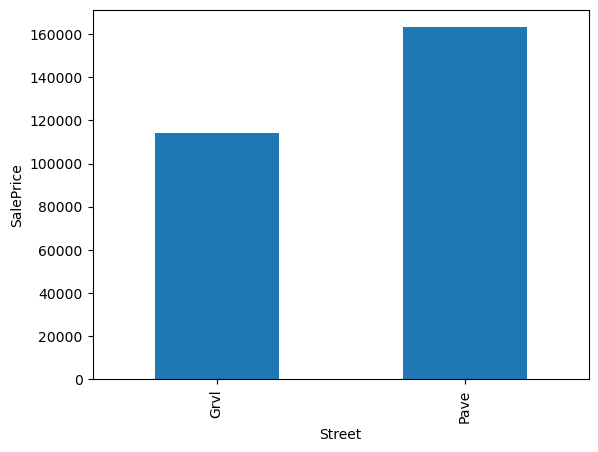

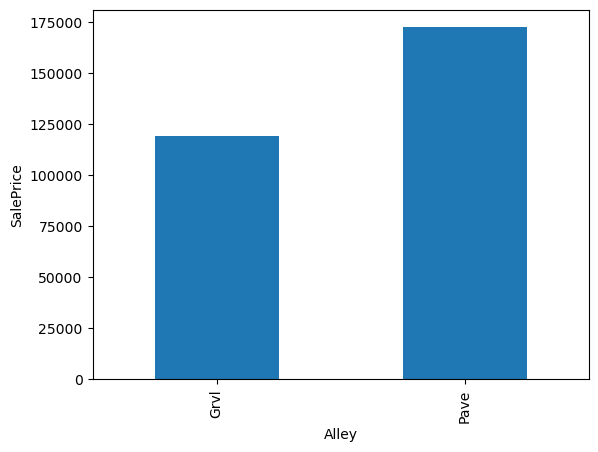

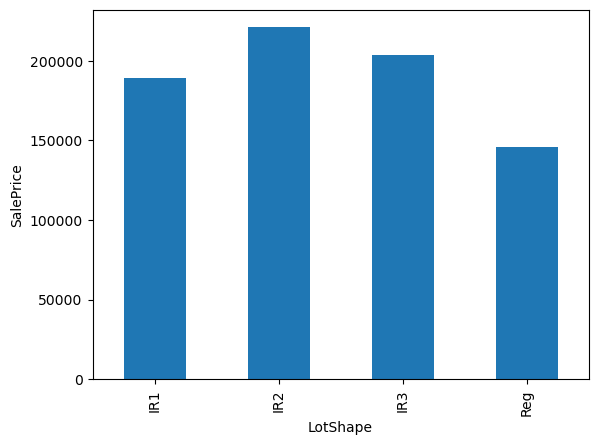

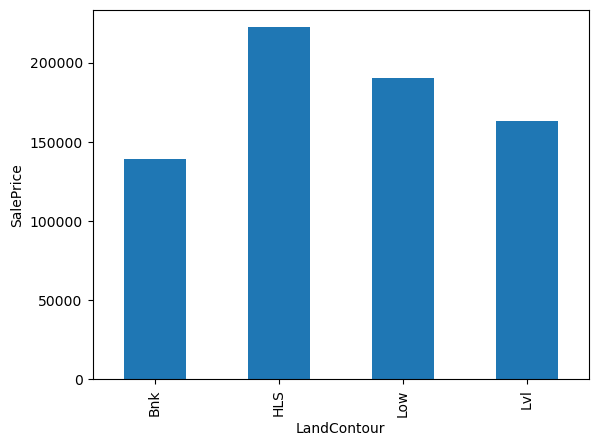

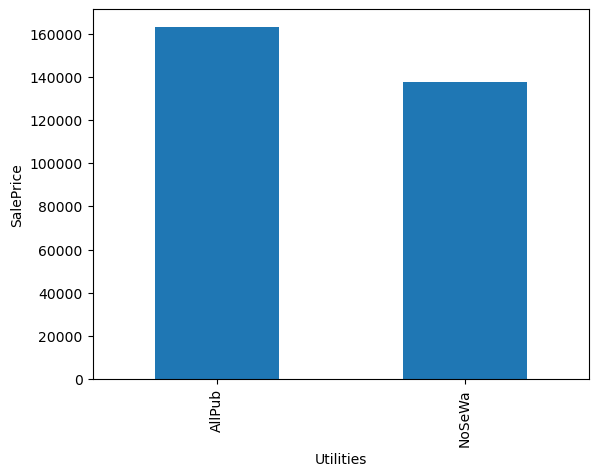

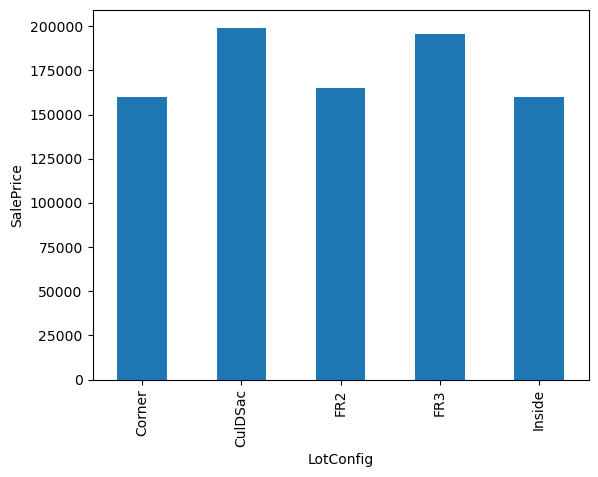

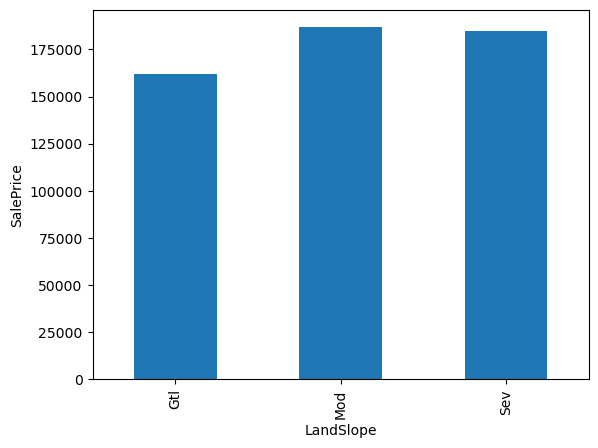

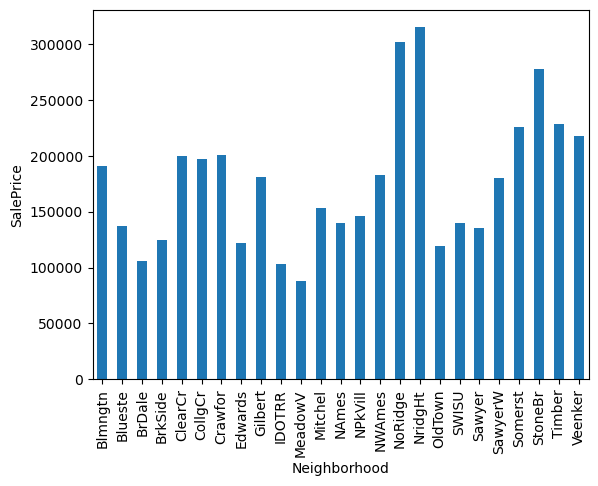

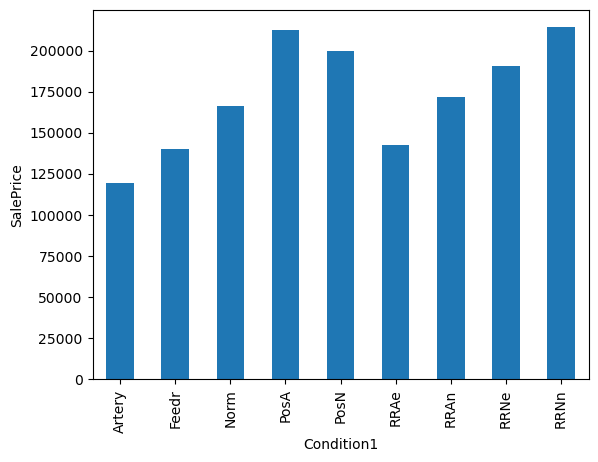

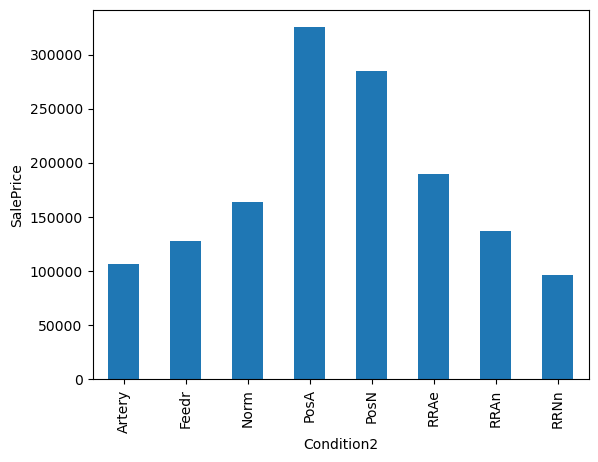

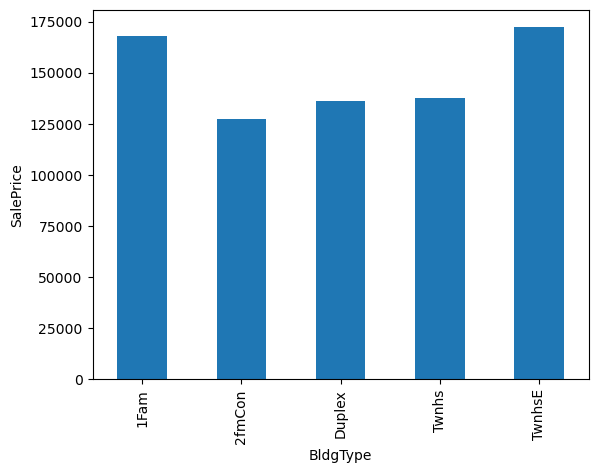

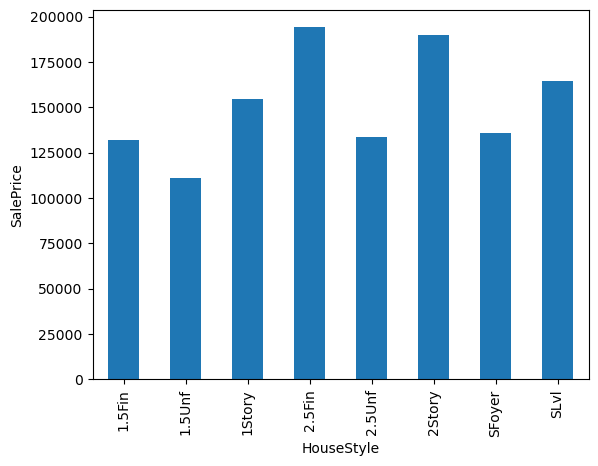

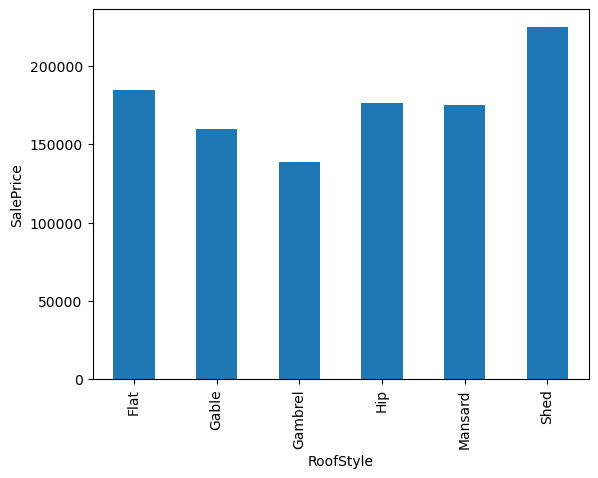

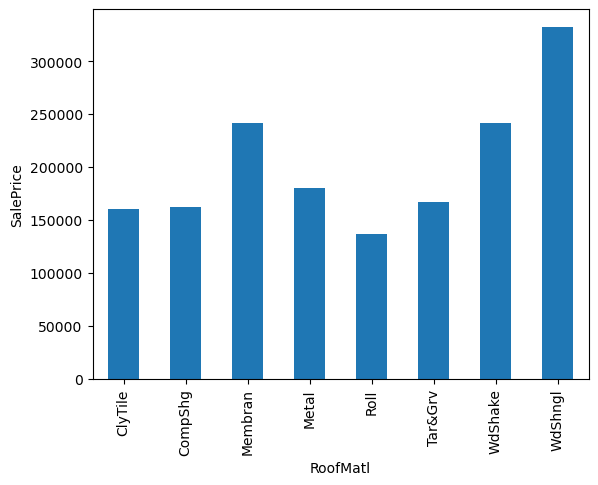

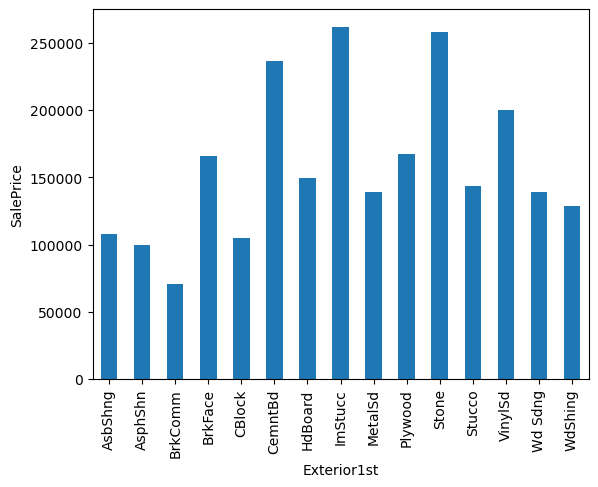

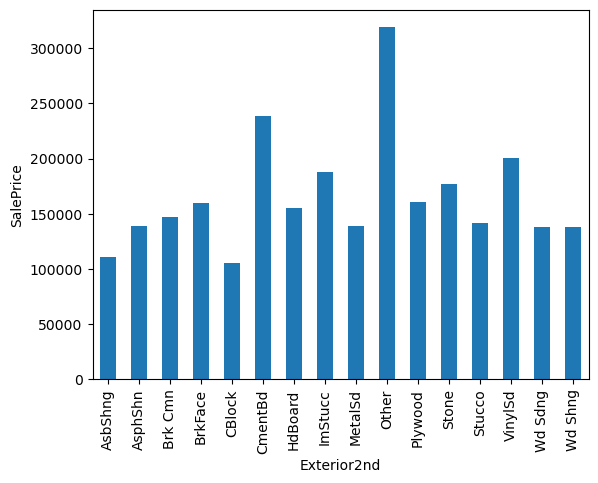

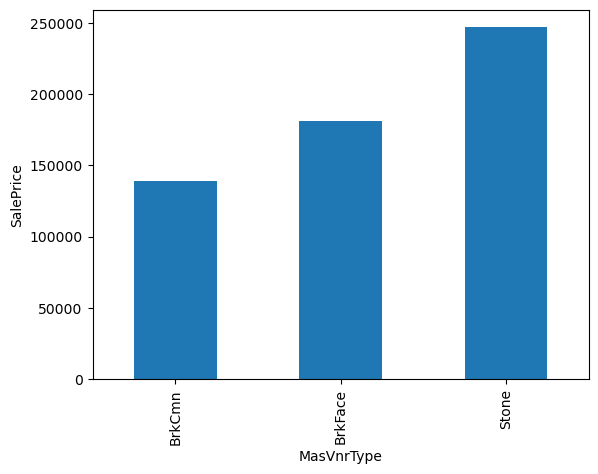

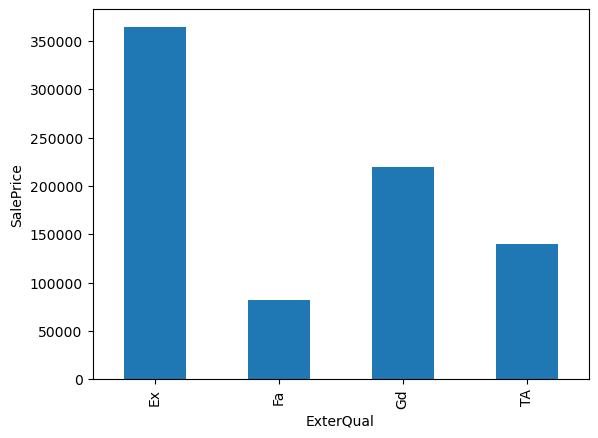

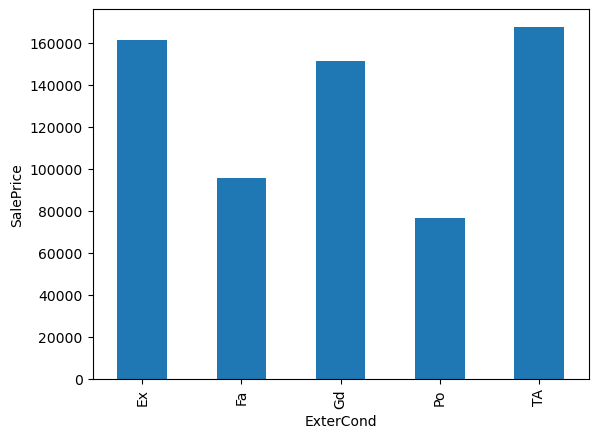

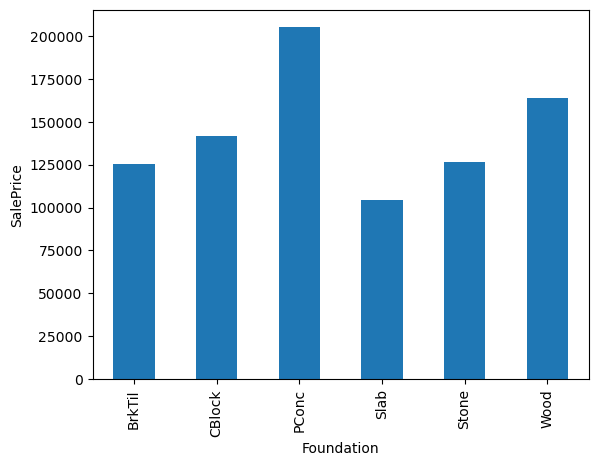

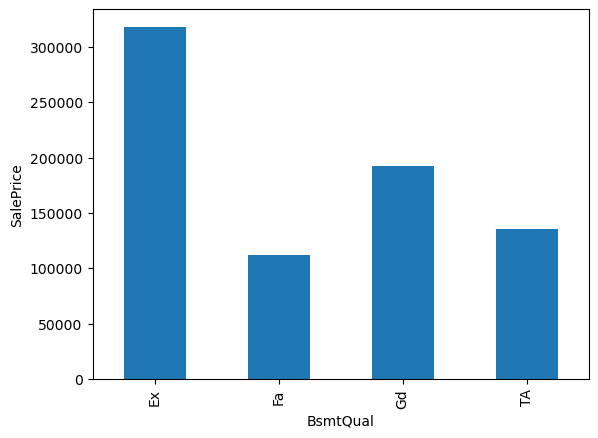

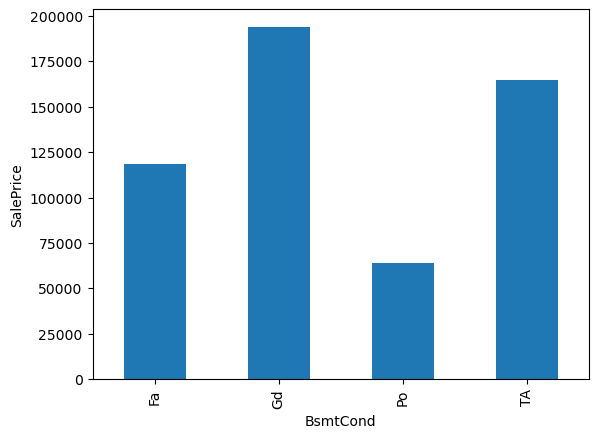

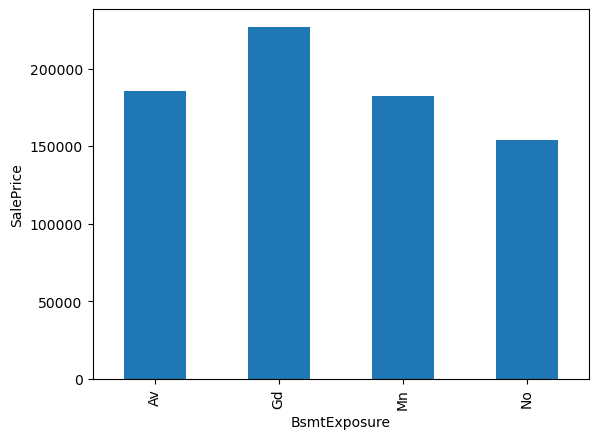

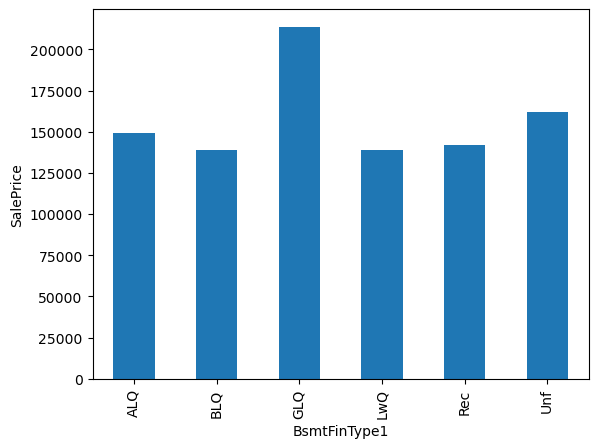

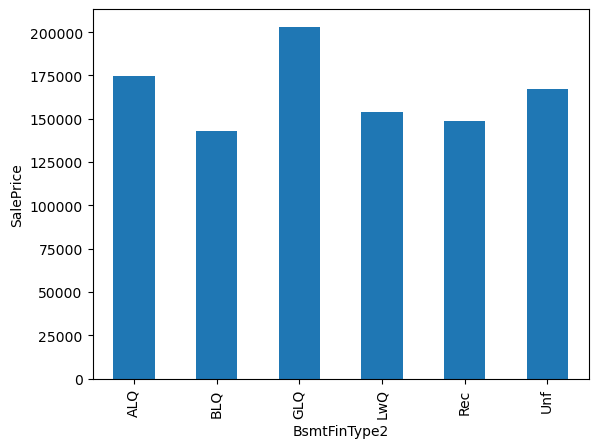

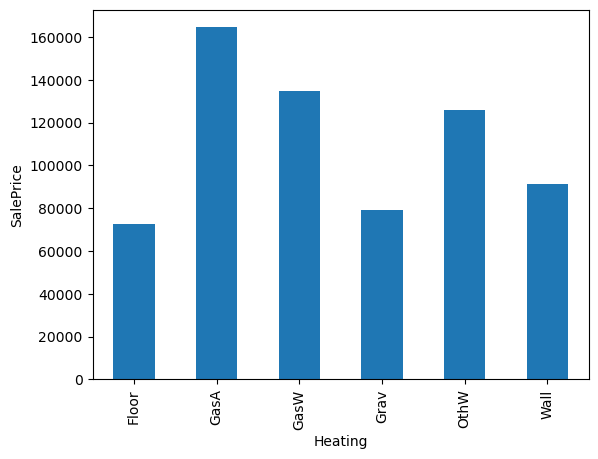

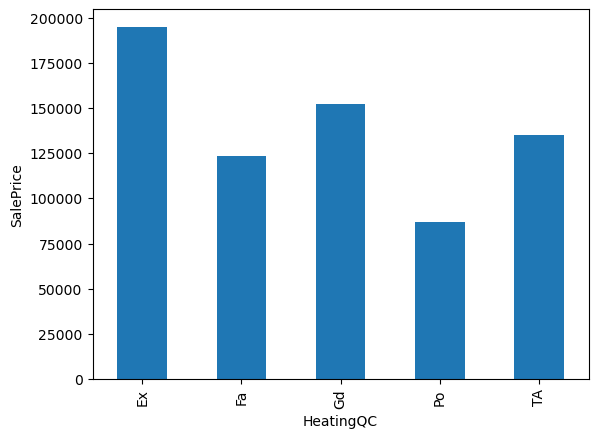

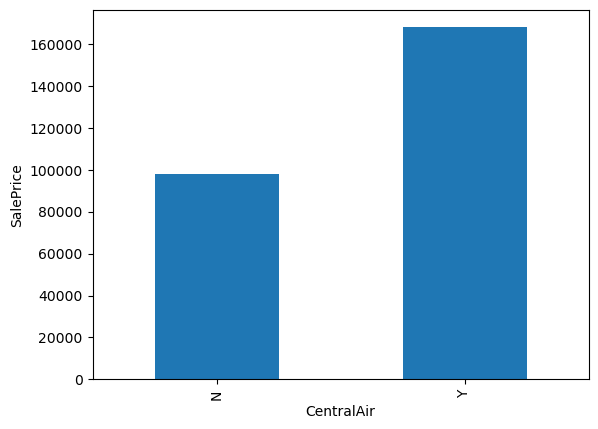

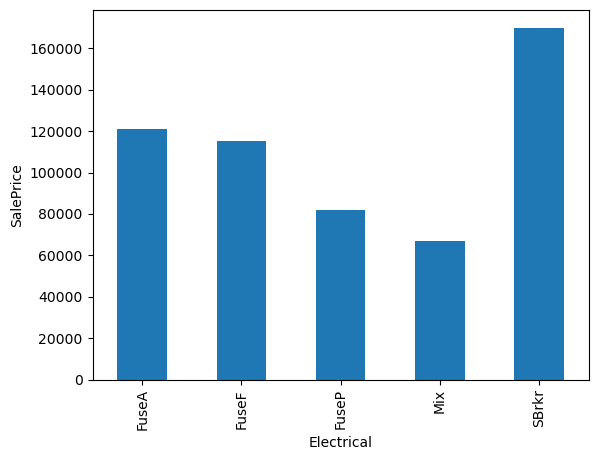

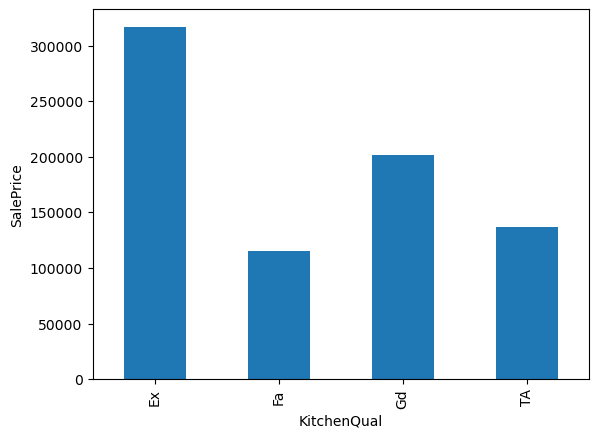

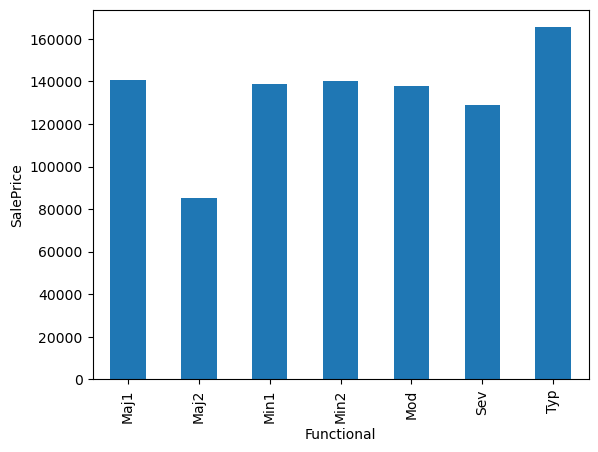

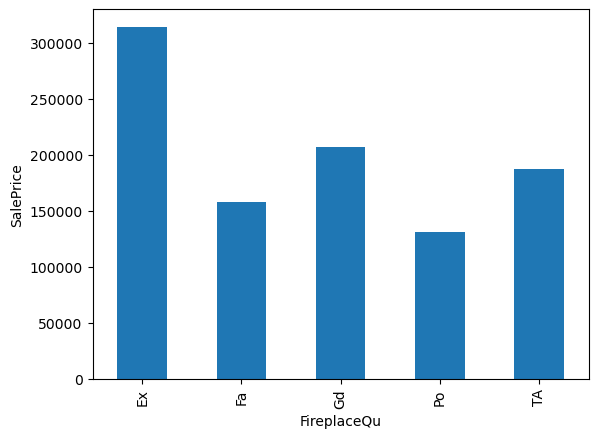

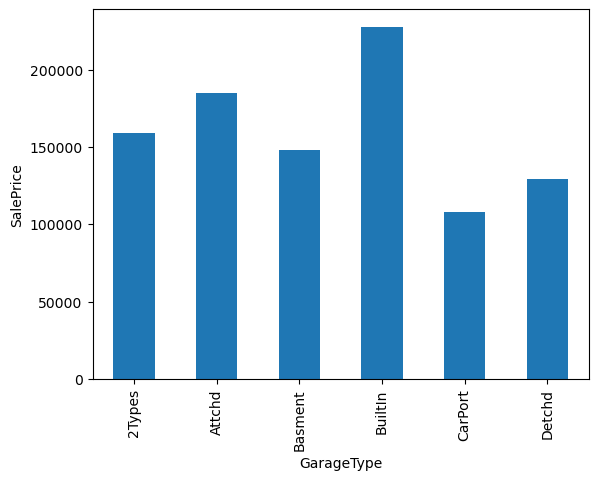

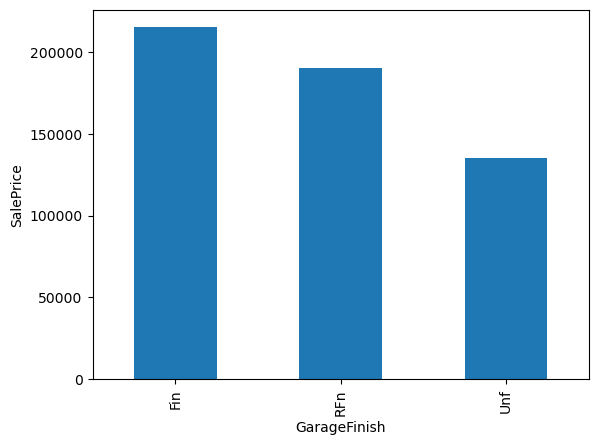

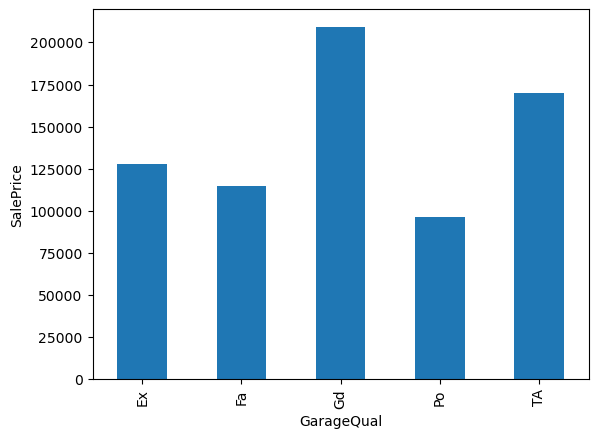

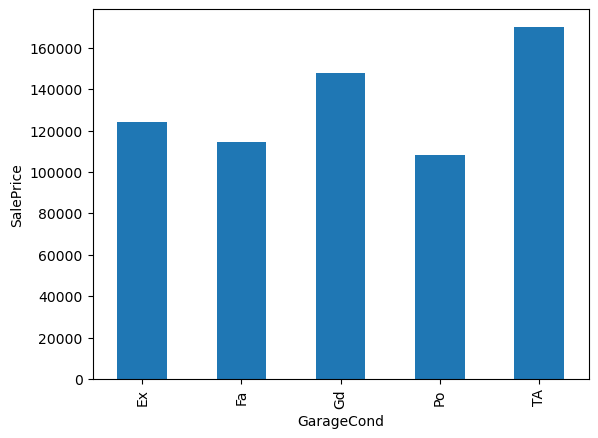

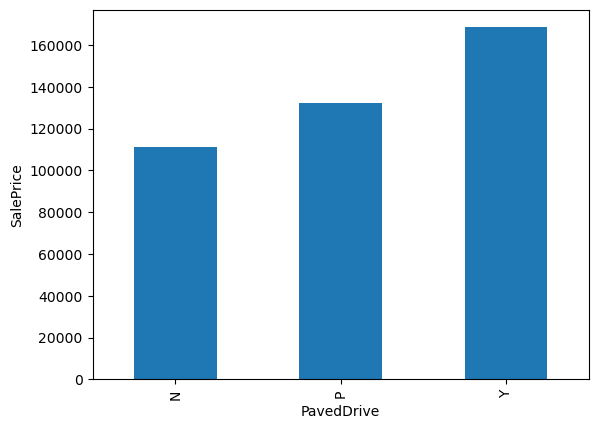

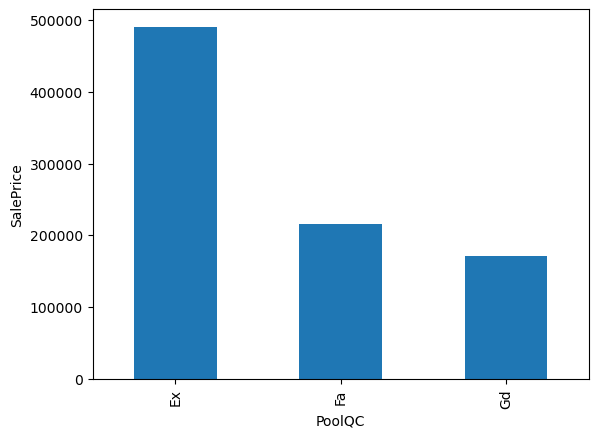

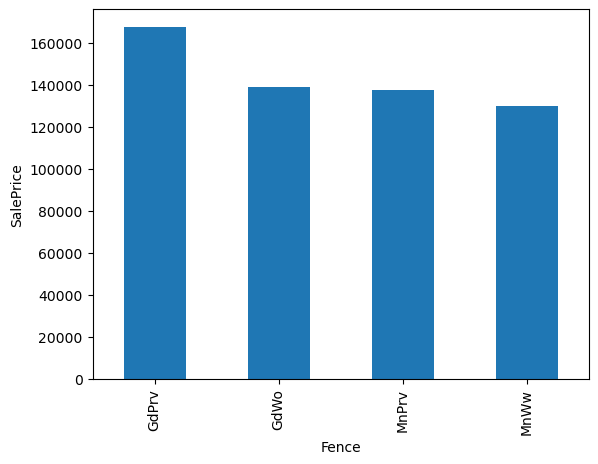

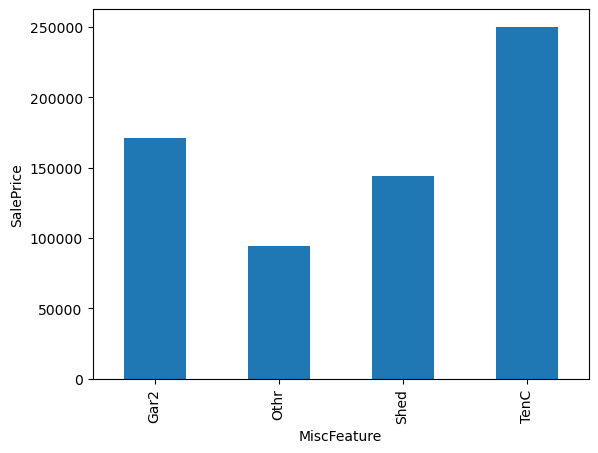

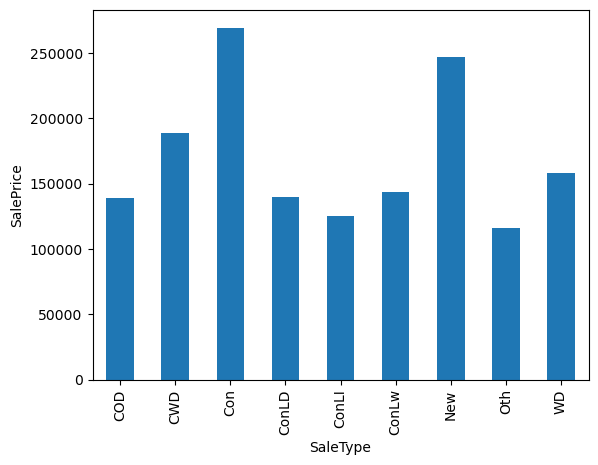

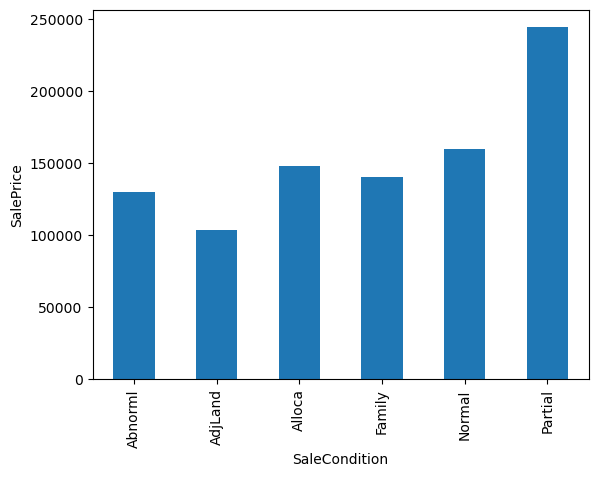

In [32]:
#PLOTTING TO SEE THE RELATION BETWEEN CATEGORICAL FEATURES AND SALEPRICE

for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [33]:
#LIST TO DEFINE CATEGORICAL FEATURES HAVING NAN VALUE

nan_categorical = [feature for feature in categorical_features if df[feature].isnull().sum()>0]
for feature in nan_categorical:
    print(feature , ' ---> ',df[feature].isnull().sum())

Alley  --->  1369
MasVnrType  --->  872
BsmtQual  --->  37
BsmtCond  --->  37
BsmtExposure  --->  38
BsmtFinType1  --->  37
BsmtFinType2  --->  38
Electrical  --->  1
FireplaceQu  --->  690
GarageType  --->  81
GarageFinish  --->  81
GarageQual  --->  81
GarageCond  --->  81
PoolQC  --->  1453
Fence  --->  1179
MiscFeature  --->  1406


In [34]:
#FUNCTION TO REPLACE NULL CATEFORICAL FEATURE VALUES TO "MISSING"

def replace_null_cat(df,nan_categorical):
    data =df.copy()
    for feature in nan_categorical:
        data[feature]= data[feature].fillna('Missing')
    return data
c = replace_null_cat(df,nan_categorical)

In [35]:
c[nan_categorical].isnull().sum()


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [36]:
df = c

In [37]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape   
0   1          60       RL         65.0     8450   Pave  Missing      Reg  \
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5          5  \
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr       856       854             0  \
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0       1710             1             0         2         1             3  \
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0     Missing  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [38]:
#LIST TO DEFINE NUMERICAL FEATURES WITH NAN VALUES

nan_numerical =[feature for feature in num_features if df[feature].isnull().sum()>0]
nan_numerical

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [39]:
#FUNCTION TO DEFINE NEW COLUMNS FOR NAN VALUES AND REPLACING THE NAN VALUE WITH MEDIAN OF THE FEATURE 

def replace_null_num(df,nan_numerical):
    data = df.copy()
    for feature in nan_numerical:
        data[feature+'nan']= np.where(data[feature].isnull(),1,0)
        data[feature].fillna(data[feature].median(),inplace =True)
    return data
        

In [40]:
d = replace_null_num(df,nan_numerical)

In [41]:
for feature in d.columns:
    if 'nan' in feature:
        print(feature)

LotFrontagenan
MasVnrAreanan
GarageYrBltnan


In [42]:
d.shape

(1460, 84)

In [43]:
df = d

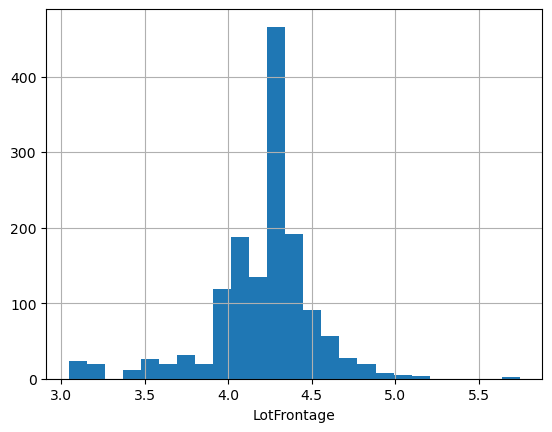

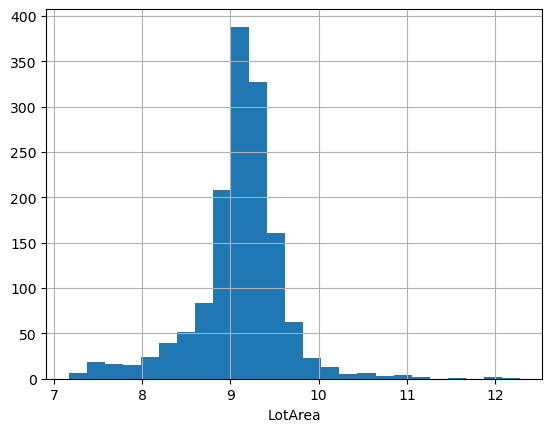

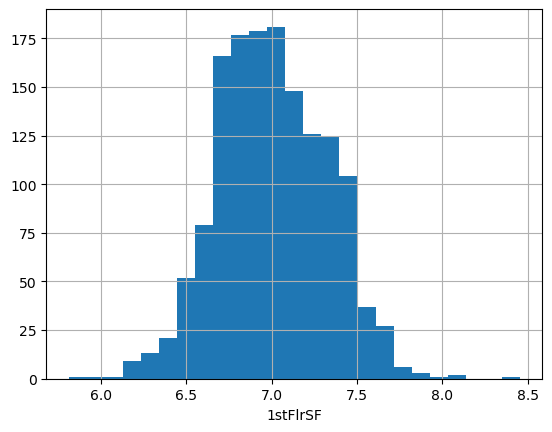

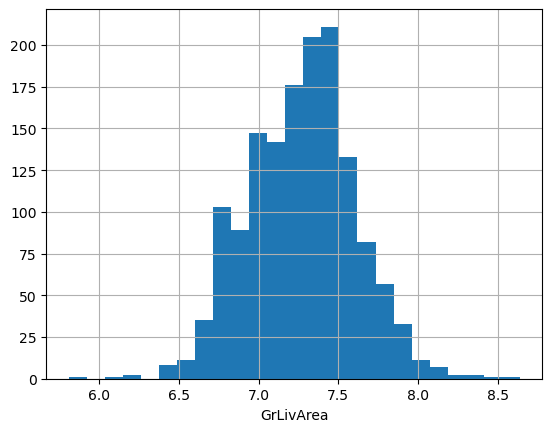

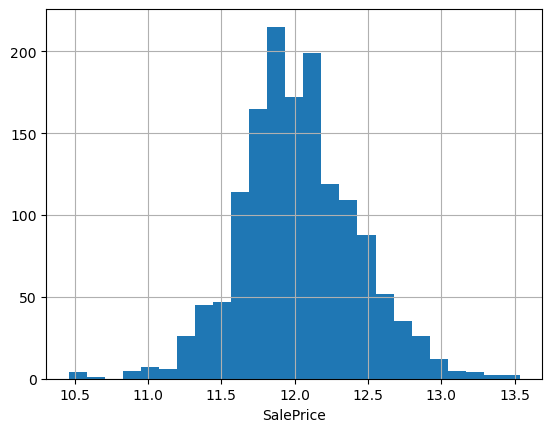

In [44]:
#WE ARE CONVERTING THE CONTINUOUS FEATURES INTO LOG-NORMAL DISTRIBUTION

for feature in continuous_features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df[feature].hist(bins =25)
        plt.xlabel(feature)
        plt.show()

In [45]:
df.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape   
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg  \
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1   
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm  \
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt   
0       Norm     1Fam     2Story            7            5          5  \
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType   
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace  \
1            31     Gable  CompShg     MetalSd     MetalSd    Missing   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng    Missing   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure   
0       196.0        Gd        TA      PConc       Gd       TA           No  \
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
0          GLQ         706          Unf           0        150          856  \
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF   
0    GasA        Ex          Y      SBrkr  6.752270       854             0  \
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr   
0   7.444249             1             0         2         1             3  \
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu   
0             1          Gd             8        Typ           0     Missing  \
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

In [46]:
# CHECKING THE NO OF OCCURENCES OF EACH LABEL IN EVERY CATEGORICAL FEATURE SO THAT THE FEATURES THAT ARE VERY LESS CAN BE IGNORED
# WE USE THE GROUPBY.COUNT() FUNCTION HERE WHICH DOESN'T TAKE NaN VALUES.
for feature in categorical_features:
    a = df.groupby(feature)["SalePrice"].count()
    print(feature," --> ",a)
    print("\n")
len(df)

MSZoning  -->  MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64


Street  -->  Street
Grvl       6
Pave    1454
Name: SalePrice, dtype: int64


Alley  -->  Alley
Grvl         50
Missing    1369
Pave         41
Name: SalePrice, dtype: int64


LotShape  -->  LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: SalePrice, dtype: int64


LandContour  -->  LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: SalePrice, dtype: int64


Utilities  -->  Utilities
AllPub    1459
NoSeWa       1
Name: SalePrice, dtype: int64


LotConfig  -->  LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: SalePrice, dtype: int64


LandSlope  -->  LandSlope
Gtl    1382
Mod      65
Sev      13
Name: SalePrice, dtype: int64


Neighborhood  -->  Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilber

1460

In [47]:
# HERE WE USE THE GROUPBY.SIZE() FUNCTION WHICH TAKES INTO CONSIDERATION THE NaN VALUES.

for feature in categorical_features:
    a = df.groupby(feature)['SalePrice']
    print(a.size())

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64
Street
Grvl       6
Pave    1454
Name: SalePrice, dtype: int64
Alley
Grvl         50
Missing    1369
Pave         41
Name: SalePrice, dtype: int64
LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: SalePrice, dtype: int64
LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: SalePrice, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: SalePrice, dtype: int64
LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: SalePrice, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: SalePrice, dtype: int64
Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       

In [48]:
for feature in categorical_features:
    print(df[feature].index)

RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=1460, step=1)
RangeIndex(start=0, stop=

In [49]:
for feature in categorical_features:
    # FOR EVERY FEATURE, COUNT THE OCCURANCES OF FEATURE AND DIVIDE IT BY LENGTH OF COLUMN.
    a= df.groupby(feature)['SalePrice'].count() / len(df)
    # b IS A DATAFRAME WHERE THE ELEMNTS HAVE THE INDEX VALUE ONLY WHEN THE CONTRIBUTION OF FEATURE LABELS IS GREATER THAN 1%.
    b = a[a>0.01].index
    #REPLACE THE LABELS WHERE THE CONTRIBUTION IS LESS THAN 1%.
    df[feature] = np.where(df[feature].isin(b),df[feature],'Infrequent')
    

In [50]:
df.head(50)

Id  MSSubClass    MSZoning  LotFrontage   LotArea Street    Alley   
0    1          60          RL     4.174387  9.041922   Pave  Missing  \
1    2          20          RL     4.382027  9.169518   Pave  Missing   
2    3          60          RL     4.219508  9.328123   Pave  Missing   
3    4          70          RL     4.094345  9.164296   Pave  Missing   
4    5          60          RL     4.430817  9.565214   Pave  Missing   
5    6          50          RL     4.442651  9.554993   Pave  Missing   
6    7          20          RL     4.317488  9.218705   Pave  Missing   
7    8          60          RL     4.234107  9.247829   Pave  Missing   
8    9          50          RM     3.931826  8.719317   Pave  Missing   
9   10         190          RL     3.912023  8.911934   Pave  Missing   
10  11          20          RL     4.248495  9.323669   Pave  Missing   
11  12          60          RL     4.442651  9.386308   Pave  Missing   
12  13          20          RL     4.234107  9.470240   Pave  Missing   
13  14          20          RL     4.510860  9.273503   Pave  Missing   
14  15          20          RL     4.234107  9.298351   Pave  Missing   
15  16          45          RM     3.931826  8.719317   Pave  Missing   
16  17          20          RL     4.234107  9.327323   Pave  Missing   
17  18          90          RL     4.276666  9.286468   Pave  Missing   
18  19          20          RL     4.189655  9.524786   Pave  Missing   
19  20          20          RL     4.248495  8.930626   Pave  Missing   
20  21          60          RL     4.615121  9.562053   Pave  Missing   
21  22          45          RM     4.043051  8.915835   Pave     Grvl   
22  23          20          RL     4.317488  9.184202   Pave  Missing   
23  24         120          RM     3.784190  8.348538   Pave  Missing   
24  25          20          RL     4.234107  9.017484   Pave  Missing   
25  26          20          RL     4.700480  9.563108   Pave  Missing   
26  27          20          RL     4.094345  8.881836   Pave  Missing   
27  28          20          RL     4.584967  9.348187   Pave  Missing   
28  29          20          RL     3.850148  9.700208   Pave  Missing   
29  30          30          RM     4.094345  8.752107   Pave  Missing   
30  31          70  Infrequent     3.912023  9.047821   Pave     Pave   
31  32          20          RL     4.234107  9.052985   Pave  Missing   
32  33          20          RL     4.442651  9.310095   Pave  Missing   
33  34          20          RL     4.248495  9.264071   Pave  Missing   
34  35         120          RL     4.094345  8.897409   Pave  Missing   
35  36          60          RL     4.682131  9.504352   Pave  Missing   
36  37          20          RL     4.718499  9.292750   Pave  Missing   
37  38          20          RL     4.304065  9.051579   Pave  Missing   
38  39          20          RL     4.219508  8.977399   Pave  Missing   
39  40          90          RL     4.174387  8.706159   Pave  Missing   
40  41          20          RL     4.430817  9.066239   Pave  Missing   
41  42          20          RL     4.744932  9.735365   Pave  Missing   
42  43          85          RL     4.234107  9.124782   Pave  Missing   
43  44          20          RL     4.234107  9.126959   Pave  Missing   
44  45          20          RL     4.248495  8.980298   Pave  Missing   
45  46         120          RL     4.110874  8.943506   Pave  Missing   
46  47          50          RL     3.871201  9.458918   Pave  Missing   
47  48          20          FV     4.430817  9.314340   Pave  Missing   
48  49         190          RM     3.496508  8.402007   Pave  Missing   
49  50          20          RL     4.189655  8.954415   Pave  Missing   

   LotShape LandContour Utilities LotConfig LandSlope Neighborhood   
0       Reg         Lvl    AllPub    Inside       Gtl      CollgCr  \
1       Reg         Lvl    AllPub       FR2       Gtl   Infrequent   
2       IR1         Lvl    AllPub    Inside       Gtl      CollgCr   


Now we have to convert the categorical data into numerical encoding. Here, we will use Label Encoding.

In [51]:
#FIRST, WE WILL CONVERT THE CATEGORICAL FEATURES INTO CATEGORY TYPE.

for feature in categorical_features:
    df[feature] = df[feature].astype('category')

In [52]:
#SELECTING THE CATEGORY-TYPE FEATURES INTO A COLUMN SERIES

cat_features = df.select_dtypes(['category']).columns

In [53]:
#APPLYING THE X.CAT.CODES FUNCTION TO PERFORM THE LABEL ENCODING TO EVERY FEATURE COLUMN.

df[cat_features] = df[cat_features].apply(lambda x: x.cat.codes)

In [54]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape   
0   1          60         3     4.174387  9.041922       1      1         3  \
1   2          20         3     4.382027  9.169518       1      1         3   
2   3          60         3     4.219508  9.328123       1      1         0   
3   4          70         3     4.094345  9.164296       1      1         0   
4   5          60         3     4.430817  9.565214       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1   
0            3          0          4          0             4           3  \
1            3          0          2          0             9           1   
2            3          0          4          0             4           3   
3            3          0          0          0             5           3   
4            3          0          2          0            14           3   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt   
0           1         0           2            7            5          5  \
1           1         0           1            6            8         31   
2           1         0           2            7            5          7   
3           1         0           2            7            5         91   
4           1         0           2            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType   
0             5          0         0            8            8           1  \
1            31          0         0            5            5           2   
2             6          0         0            8            8           1   
3            36          0         0            9           10           2   
4             8          0         0            8            8           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond   
0       196.0          1          3           3         2         4  \
1         0.0          3          3           1         2         4   
2       162.0          1          3           3         2         4   
3         0.0          3          3           0         4         1   
4       350.0          1          3           3         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2   
0             4             2         706             6           0  \
1             1             0         978             6           0   
2             3             2         486             6           0   
3             4             0         216             6           0   
4             0             2         655             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical   
0        150          856        0          0           1           3  \
1        284         1262        0          0           1           3   
2        434          920        0          0           1           3   
3        540          756        0          2           1           3   
4        490         1145        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0  6.752270       854             0   7.444249             1             0  \
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   
0         2         1             3             1            2             8  \
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

In [55]:
#FEATURE SCALING
scaling_feature = [feature for feature in df.columns if feature not in ['Id','SalePrice'] ] 
scaler = MinMaxScaler()
scaler.fit(df[scaling_feature])


MinMaxScaler()

In [56]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape   
0   1          60         3     4.174387  9.041922       1      1         3  \
1   2          20         3     4.382027  9.169518       1      1         3   
2   3          60         3     4.219508  9.328123       1      1         0   
3   4          70         3     4.094345  9.164296       1      1         0   
4   5          60         3     4.430817  9.565214       1      1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1   
0            3          0          4          0             4           3  \
1            3          0          2          0             9           1   
2            3          0          4          0             4           3   
3            3          0          0          0             5           3   
4            3          0          2          0            14           3   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt   
0           1         0           2            7            5          5  \
1           1         0           1            6            8         31   
2           1         0           2            7            5          7   
3           1         0           2            7            5         91   
4           1         0           2            8            5          8   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType   
0             5          0         0            8            8           1  \
1            31          0         0            5            5           2   
2             6          0         0            8            8           1   
3            36          0         0            9           10           2   
4             8          0         0            8            8           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond   
0       196.0          1          3           3         2         4  \
1         0.0          3          3           1         2         4   
2       162.0          1          3           3         2         4   
3         0.0          3          3           0         4         1   
4       350.0          1          3           3         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2   
0             4             2         706             6           0  \
1             1             0         978             6           0   
2             3             2         486             6           0   
3             4             0         216             6           0   
4             0             2         655             6           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical   
0        150          856        0          0           1           3  \
1        284         1262        0          0           1           3   
2        434          920        0          0           1           3   
3        540          756        0          2           1           3   
4        490         1145        0          0           1           3   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0  6.752270       854             0   7.444249             1             0  \
1  7.140453         0             0   7.140453             0             1   
2  6.824374       866             0   7.487734             1             0   
3  6.867974       756             0   7.448334             1             0   
4  7.043160      1053             0   7.695303             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   
0         2         1             3             1            2             8  \
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1        

In [57]:
#CONCATINATING THE TWO COLUMNS--> 1) DATAFRAME CONTAINING ID AND SALEPRICE.....2) DATAFRAME CONTAINING TRANSFORMED VALUES OF SCALING FEATURE ......
#WITH AXIS =1 MEANS THEY SHOULD BE JOINED IN COLUMN FORMAT

df_train = pd.concat([df[['Id','SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[scaling_feature]),columns=scaling_feature)],axis =1)

In [58]:
df_train.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley   
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    0.5  \
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    0.5   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    0.5   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    0.5   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    0.5   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood   
0       1.0          1.0        0.0        1.0        0.0      0.181818  \
1       1.0          1.0        0.0        0.5        0.0      0.409091   
2       0.0          1.0        0.0        1.0        0.0      0.181818   
3       0.0          1.0        0.0        0.0        0.0      0.227273   
4       0.0          1.0        0.0        0.5        0.0      0.636364   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond   
0         0.6         1.0       0.0         0.4     0.666667        0.500  \
1         0.2         1.0       0.0         0.2     0.555556        0.875   
2         0.6         1.0       0.0         0.4     0.666667        0.500   
3         0.6         1.0       0.0         0.4     0.666667        0.500   
4         0.6         1.0       0.0         0.4     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd   
0   0.036765      0.098361        0.0       0.0          0.8          0.8  \
1   0.227941      0.524590        0.0       0.0          0.5          0.5   
2   0.051471      0.114754        0.0       0.0          0.8          0.8   
3   0.669118      0.606557        0.0       0.0          0.9          1.0   
4   0.058824      0.147541        0.0       0.0          0.8          0.8   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual   
0    0.333333     0.12250   0.333333        1.0        0.75       0.5  \
1    0.666667     0.00000   1.000000        1.0        0.25       0.5   
2    0.333333     0.10125   0.333333        1.0        0.75       0.5   
3    0.666667     0.00000   1.000000        1.0        0.00       1.0   
4    0.333333     0.21875   0.333333        1.0        0.75       0.5   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2   
0      1.00          1.00      0.333333    0.125089           1.0         0.0  \
1      1.00          0.25      0.000000    0.173281           1.0         0.0   
2      1.00          0.75      0.333333    0.086109           1.0         0.0   
3      0.25          1.00      0.000000    0.038271           1.0         0.0   
4      1.00          0.00      0.333333    0.116052           1.0         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical   
0   0.064212     0.140098      0.0        0.0         1.0         1.0  \
1   0.121575     0.206547      0.0        0.0         1.0         1.0   
2   0.185788     0.150573      0.0        0.0         1.0         1.0   
3   0.231164     0.123732      0.0        0.5         1.0         1.0   
4   0.209760     0.187398      0.0        0.0         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath   
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0  \
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd   
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000  \
1  0.666667       0.0         0.375      0.333333     1.000000      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

In [59]:
#EXPORTING THE DATA FILE TO CSV FORMAT.

df_train.to_csv('house_prediction_train_data.csv',index = False)